# Problem Statement
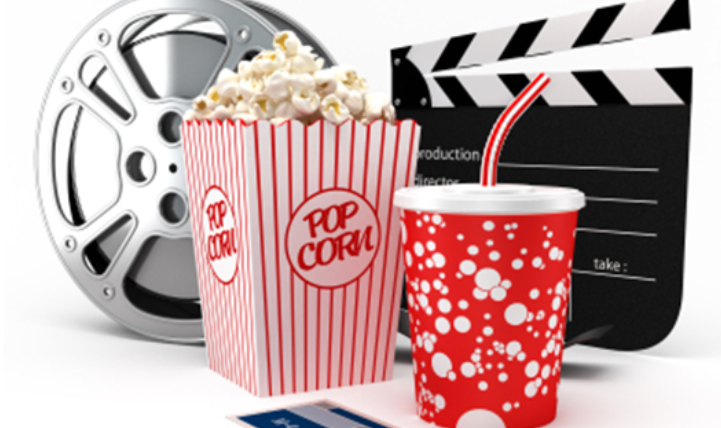
- The dataset consists of the survey data of the Movies within the years __2006-2016__
- Various variables present in the dataset inclueds genre,ratings,votes,revenues,etc .  
- The dataset comprises of __1000 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Rank          | Rank of the Movie                                        | 
| Title         | Title of the movie                        |  
| Genre         | To what Genre the movie belongs                                           | 
| Description          | The description of the movie which gives the backgound of the movie                                       |   
| Director           | Name of the director of the movie                                          |
| Actors           | Actors of the Movie                                          |
| Year         | Year in which the Movie was released |
| Runtime (Minutes)         | The duration of the movie in minutes|
| Rating       | Rating of the Movie                                             |
| Votes          | Votes given to the Movie                                           |
| Revenue (Millions)         | Revenue made by the Movie in millions                                             |
|Metascore |Score of the movie on the metacritic website|

#### Importing Packages

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output                                        # Provides a high level interface for drawing attractive and informative statistical graphics

#### Importing the Movies Dataset

In [2]:
movies=pd.read_csv("https://raw.githubusercontent.com/suyashi29/python-su/master/data/IMDB-Movie-Data.csv")

In [3]:
movies.shape

(1000, 12)

- The Movies dataset has __1000 observations__ and __12 columns__

In [4]:
movies.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

- These are the columns present in the dataset 

In [5]:
movies.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


In [6]:
movies.tail(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [8]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


- It is seen from the data that revenue has a high standard deviation and hence a large spread of revenue genration for the movies

In [9]:
m=movies.isnull().sum()
miss= (movies.isnull().sum()/len(movies))*100
miss_data=pd.concat([m,miss],axis=1,keys=['Total','%'])
print(miss_data)

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

- From the above output we can see that Revenue(Millions) and Metascore columns contains maximum null values

# Pre Profiling

In [10]:
profile = pandas_profiling.ProfileReport(movies)
profile.to_file(outputfile="Movies_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __Movies_before_preprocessing.html__.Now we will process our data to better understand it.

# Preprocessing

Dealing with missing values
- __Splitting__ the __Genre__ column to different __individual Genres__
- __Dropping__ the original __Genre column__

In [11]:
new = movies['Genre'].str.split(",", 2)
movies['Genre 1']=new.str.get(0)
movies['Genre 2']=new.str.get(1)
movies['Genre 3']=new.str.get(2)

In [12]:
movies.drop('Genre', axis = 1,inplace = True)

### Treatine missing values

In [13]:
# Metascore by Mean()
b=movies["Metascore"].mean()
movies["Metascore"].fillna(b)

0      76.000000
1      65.000000
2      62.000000
3      59.000000
4      40.000000
5      42.000000
6      93.000000
7      71.000000
8      78.000000
9      41.000000
10     66.000000
11     74.000000
12     65.000000
13     81.000000
14     70.000000
15     61.000000
16     71.000000
17     58.000000
18     69.000000
19     81.000000
20     49.000000
21     96.000000
22     72.000000
23     56.000000
24     32.000000
25     58.985043
26     58.985043
27     58.985043
28     60.000000
29     36.000000
         ...    
970    62.000000
971    58.985043
972    47.000000
973    52.000000
974    73.000000
975    37.000000
976    39.000000
977    38.000000
978    48.000000
979    70.000000
980    44.000000
981    33.000000
982    56.000000
983    30.000000
984    47.000000
985    31.000000
986    50.000000
987    30.000000
988    89.000000
989    58.985043
990    44.000000
991    42.000000
992    58.985043
993    37.000000
994    48.000000
995    45.000000
996    46.000000
997    50.0000

In [ ]:
# Metascore by Mean()
r=movies["Revenue"].mean()
movies["Revenue"].fillna(r)

# Post Pandas Profiling

In [14]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(movies)
profile.to_file(outputfile="Movies_after_preprocessing.html")

# Questions

__Q1)__ Movies made on year basis?

In [15]:
movies.groupby(['Year'])['Year'].count()

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Year, dtype: int64

#### Observation:
- From the above we can see that with passing years __more movies are being made year by year__
- The above data shows that there is a __sudden increase__ in the __creation of movies__ in year __2016 as compared to year 2015__

Text(0.5, 1.0, 'Count plot for Movies with passing Years.')

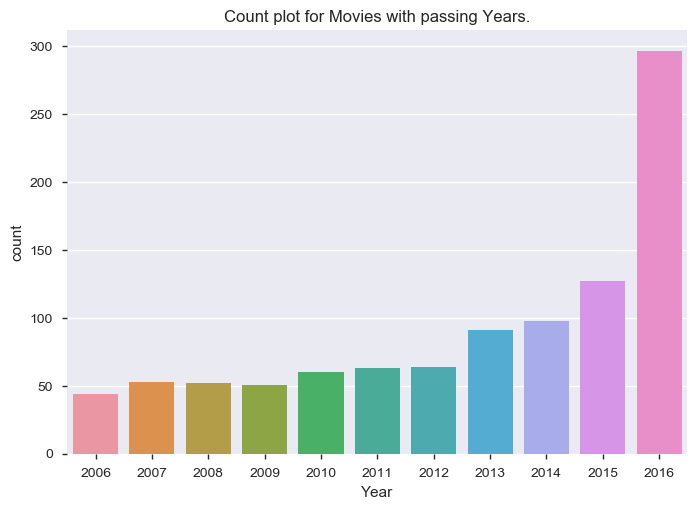

In [16]:
sns.countplot(x='Year', data=movies).set_title('Count plot for Movies with passing Years.')

__Q2)__ How many Movies did not generate revenue?

In [17]:
sum(pd.isnull(movies['Revenue (Millions)']))

128

From the above result we can see that there are __128 Movies__ which did __not generate  revenue at all even after releasing__ 

__Q3)__ What is the Rating that a movie normally gets?

In [18]:
movies.groupby(['Rating'])['Rating'].count()

Rating
1.9     1
2.7     2
3.2     1
3.5     2
3.7     2
3.9     3
4.0     1
4.1     1
4.2     2
4.3     4
4.4     1
4.5     1
4.6     5
4.7     6
4.8     4
4.9     7
5.0     4
5.1     5
5.2    11
5.3    12
5.4    12
5.5    14
5.6    17
5.7    21
5.8    26
5.9    19
6.0    26
6.1    31
6.2    37
6.3    44
6.4    35
6.5    40
6.6    42
6.7    48
6.8    37
6.9    31
7.0    46
7.1    52
7.2    42
7.3    42
7.4    33
7.5    35
7.6    27
7.7    27
7.8    40
7.9    23
8.0    19
8.1    26
8.2    10
8.3     7
8.4     4
8.5     6
8.6     3
8.8     2
9.0     1
Name: Rating, dtype: int64

#### Observation:
- From the above result we are able to observe that there is only __One Movie__ which as the __highest rating__ of __9.0__
- __One Movie__ which has the __lowest rating__ of __1.0__
- __Maximum number of Movies__ get the __rating__ of __7.1__

Text(0.5, 1.0, 'Count plot for Movies with according to their Rating.')

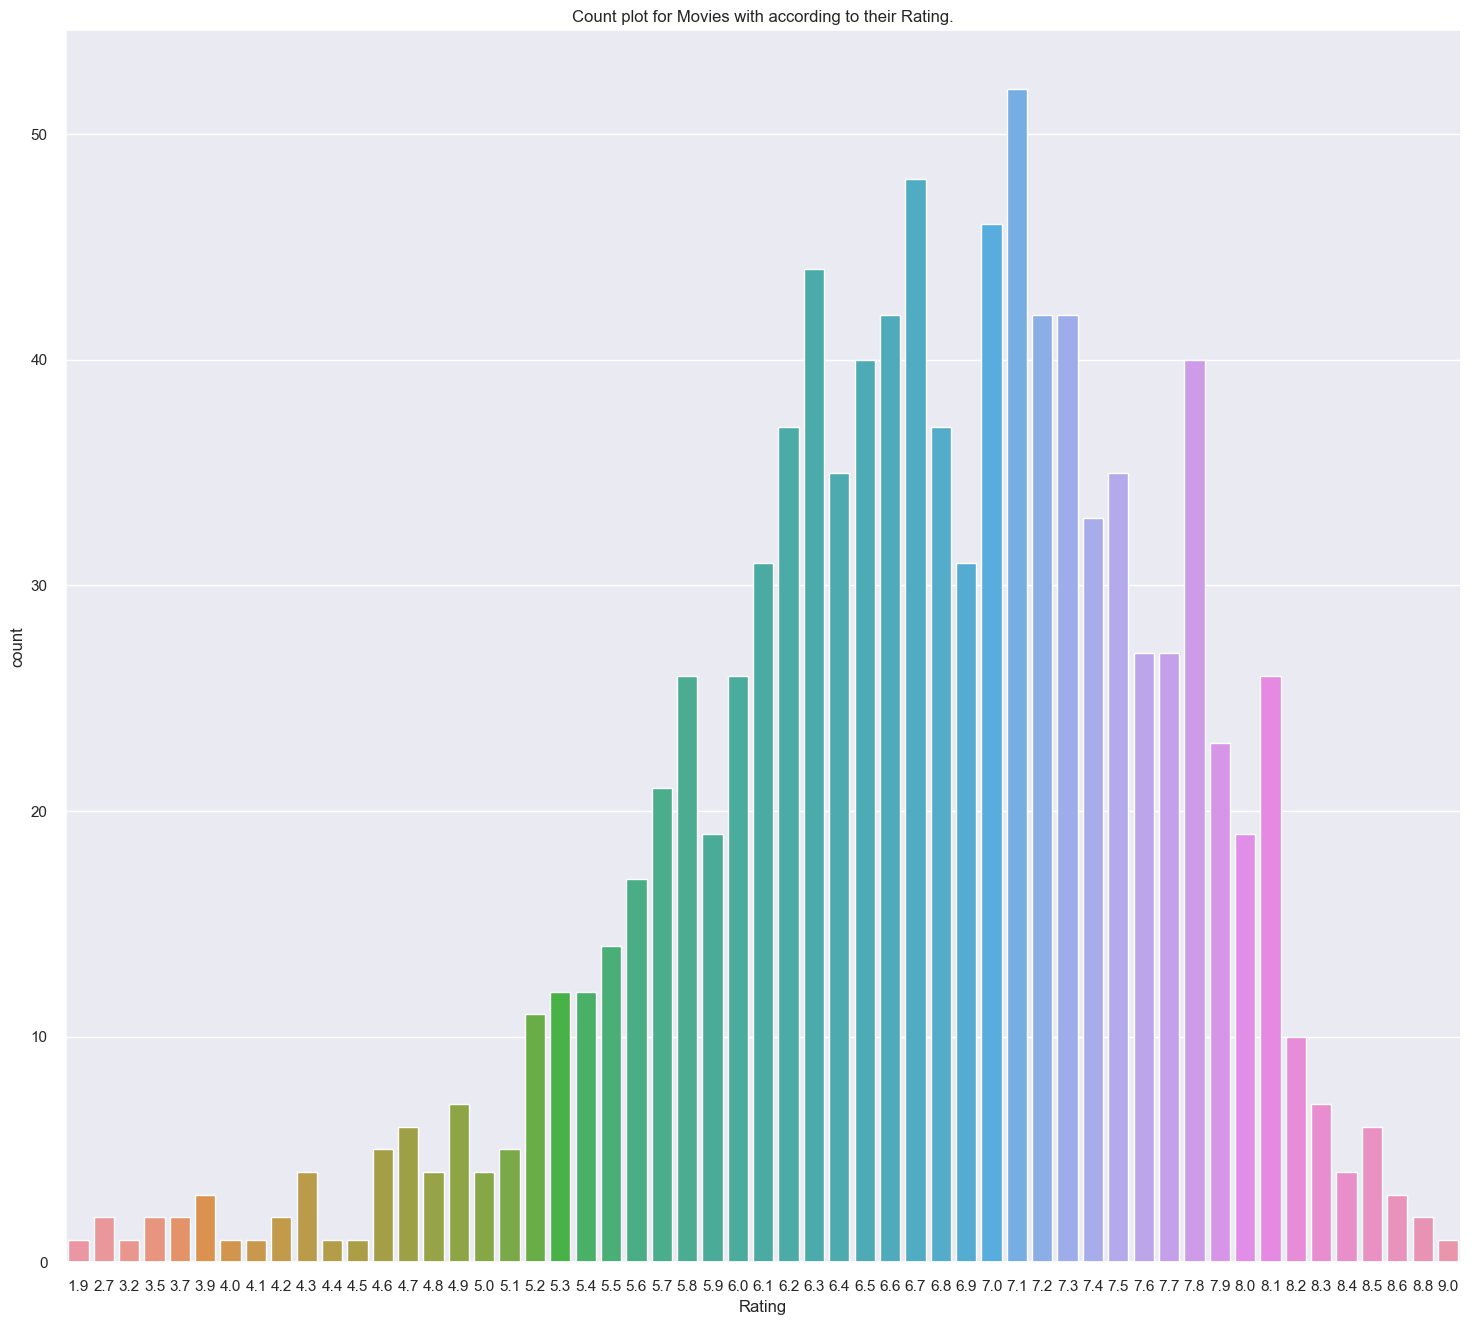

In [19]:
sns.set(rc={'figure.figsize':(18,16)})
sns.countplot(x='Rating', data=movies).set_title('Count plot for Movies with according to their Rating.')

- The data is negatively skewed

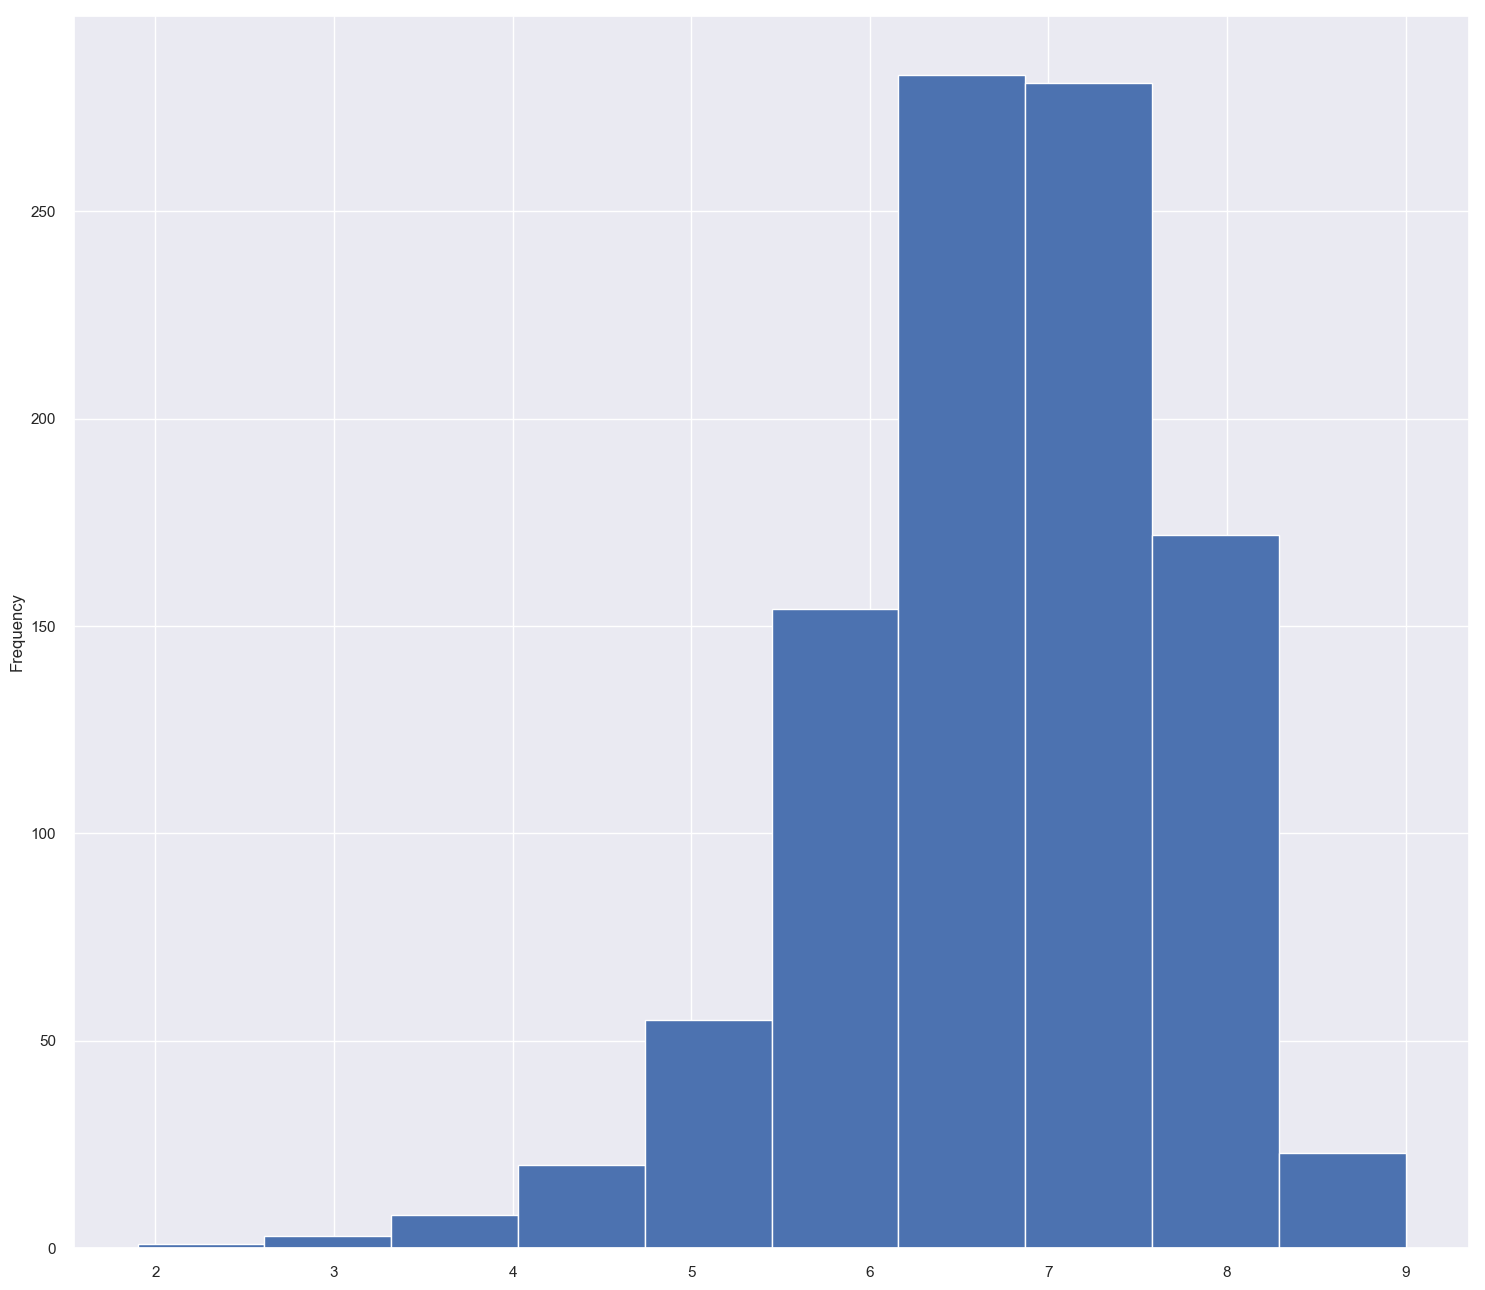

In [20]:
movies['Rating'].plot.hist()

#### Observation
- It is observed that on an __average__ a large number of movies get __ratings__ from the __range of 6.1-7.5__

__Q4)__ Which director has produced the most movies so far in the Year range 2006-2016?

In [21]:
movies.groupby(['Director'])['Director'].count().sort_values()

Director
Aamir Khan              1
Malcolm D. Lee          1
Makoto Shinkai          1
Lynne Ramsay            1
Luke Scott              1
Luke Greenfield         1
Luca Guadagnino         1
Lisa Addario            1
Liam Gavin              1
Levan Gabriadze         1
Leslye Headland         1
Lenny Abrahamson        1
Lee Unkrich             1
Lee Toland Krieger      1
Marcus Dunstan          1
Larry Charles           1
Kyle Patrick Alvarez    1
Kyle Balda              1
Kirsten Sheridan        1
Kimberly Peirce         1
Kevin Lima              1
Kenneth Lonergan        1
Ken Loach               1
Ken Kwapis              1
Kelly Fremon Craig      1
Katie Holmes            1
Jérôme Salle            1
Justin Tipping          1
Justin Simien           1
Lana Wachowski          1
                       ..
Gore Verbinski          4
Jon Favreau             4
Guy Ritchie             4
D.J. Caruso             4
Steven Spielberg        4
Tim Burton              4
Guillermo del Toro      4
Mat

#### Observation
- From above we have observed that __Director Ridley Scott__ has produced the __maximum number__ of movies which are __8__ in a __period of 2006-2016__

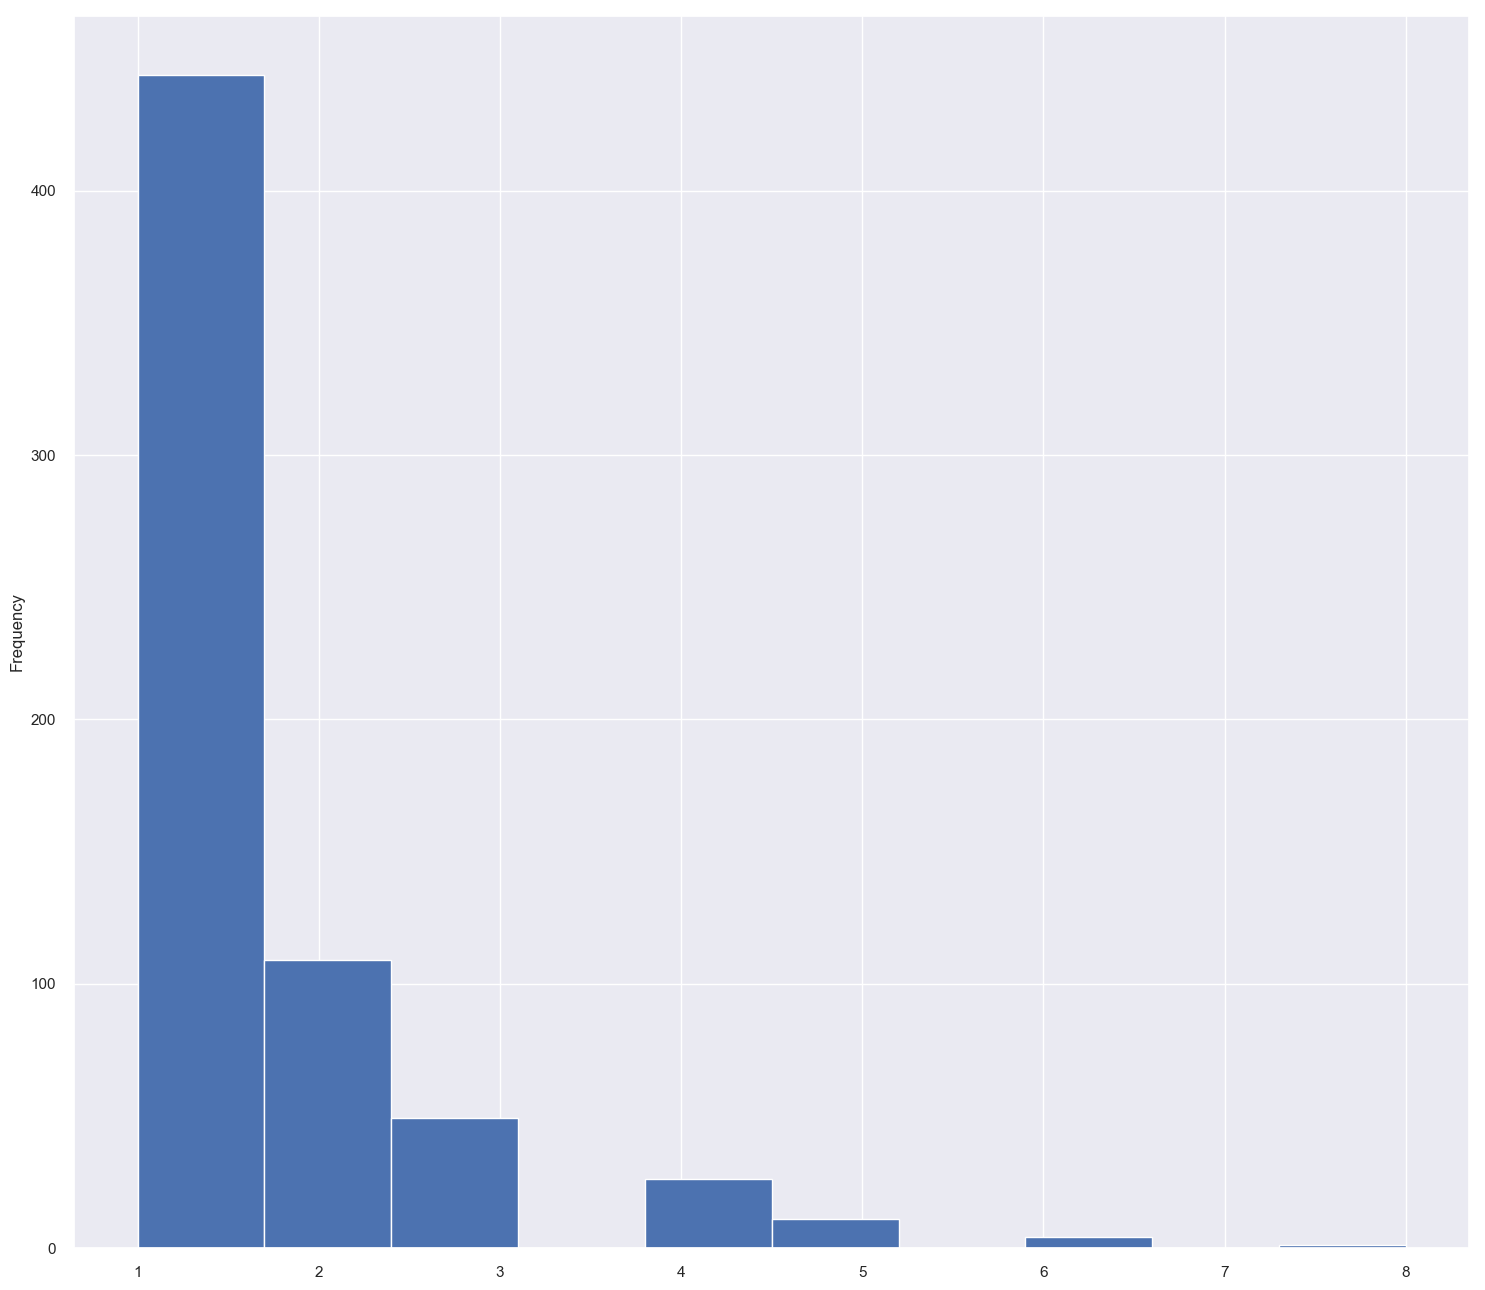

In [22]:
movies.groupby(['Director'])['Director'].count().sort_values().plot.hist()

#### Observation
- It is observed that __maximum Directors__ only __direct a movie in a span of 10 years__

__Q5)__ What is the Revenue generated by Movies, does rating affect revenue generation?

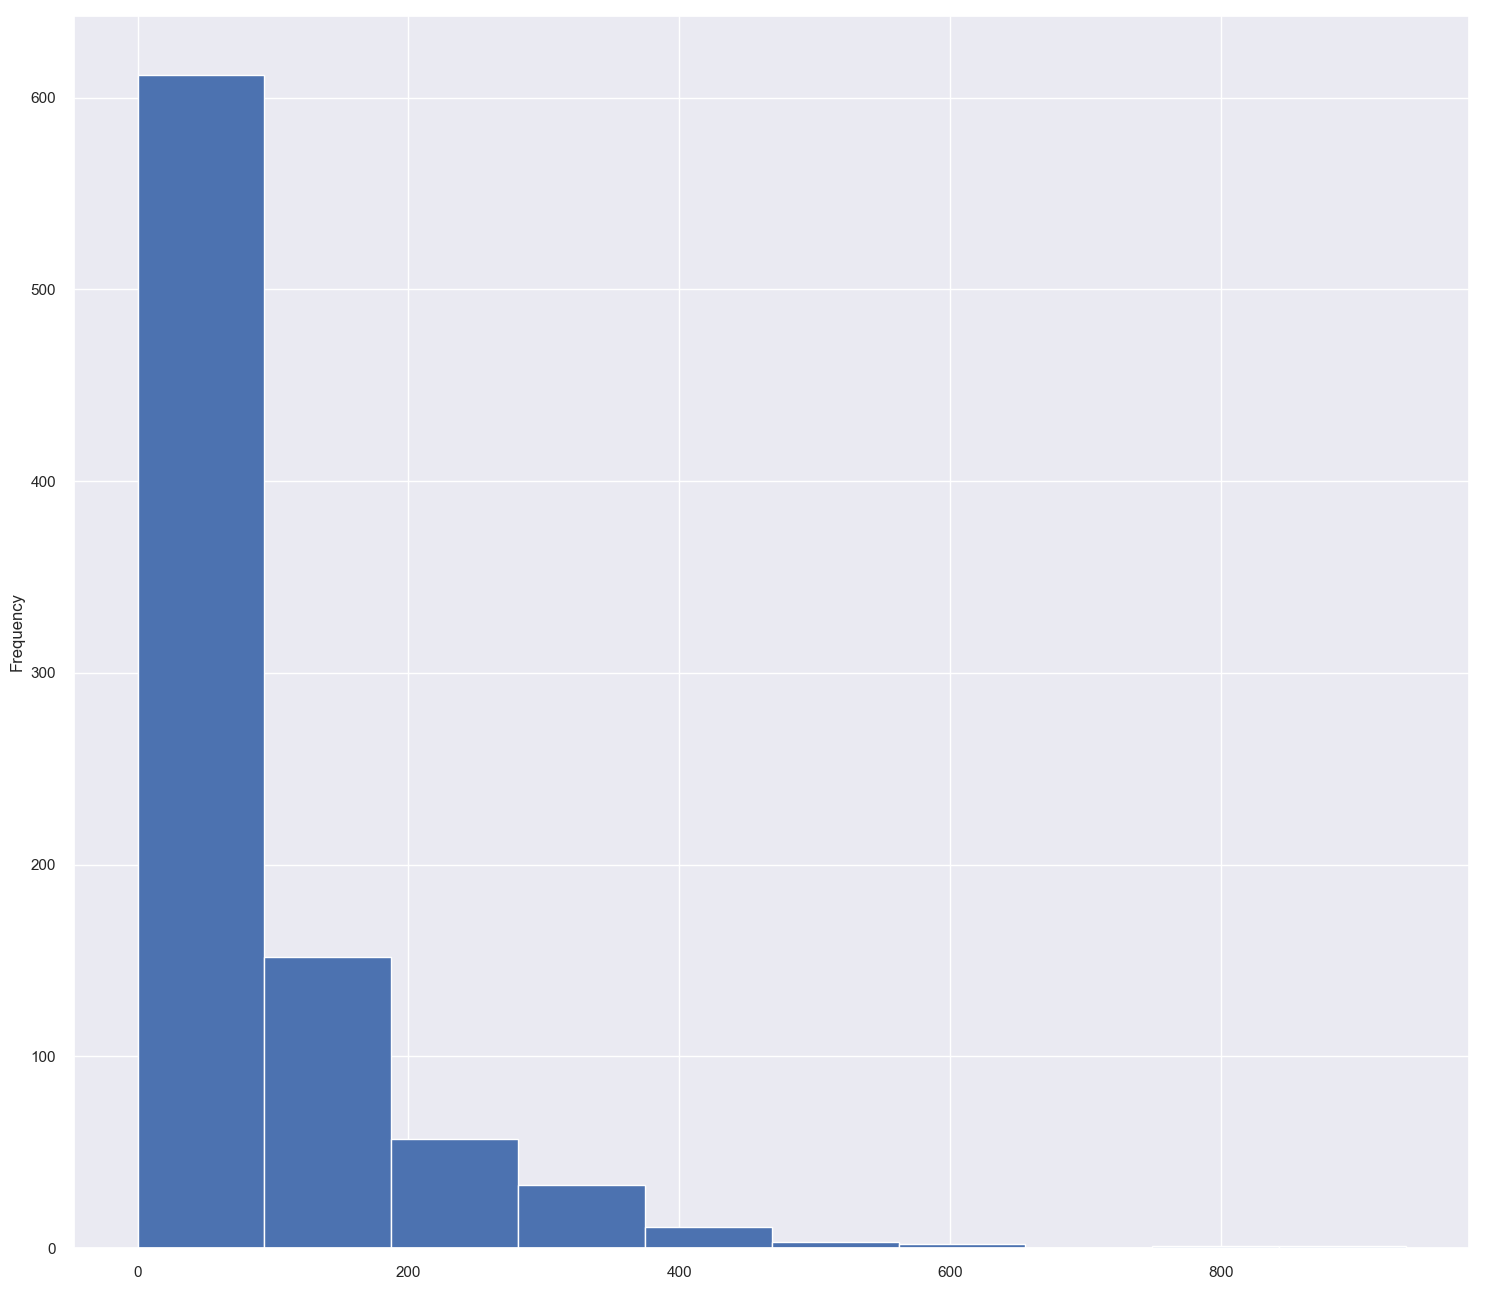

In [23]:
movies['Revenue (Millions)'].sort_values().plot.hist()

##### Observation
- __Maximum movies__ product a __revenue__ in the __range of 0-100 (Millions)__
- Very __few__ Movies generate a __revenue__ in the __range of 380-650 (Millions)__
- Positively skewed data

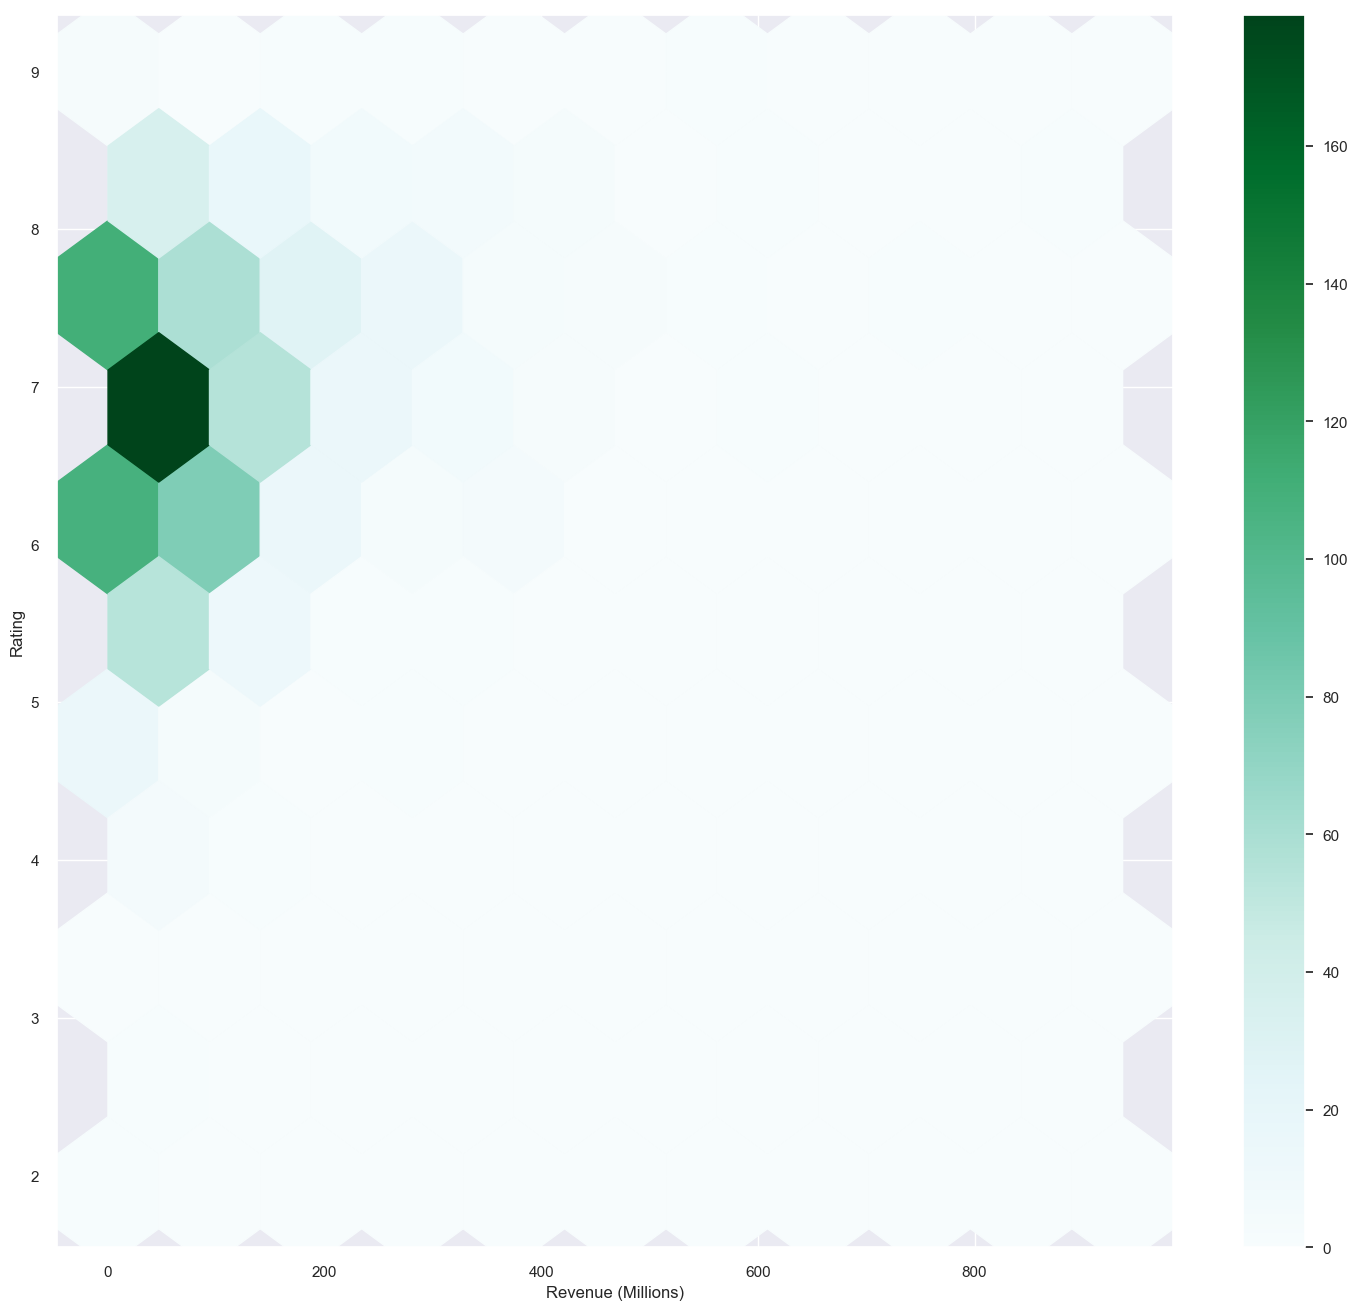

In [24]:
movies.plot.hexbin( x='Revenue (Millions)', y='Rating', gridsize=10)

#### Observation
- __Maximum movies__ with __Rating 6-7 generate a revenue of 100-200__

__Q6)__ Runtimes of movies affect revenue and ratings?

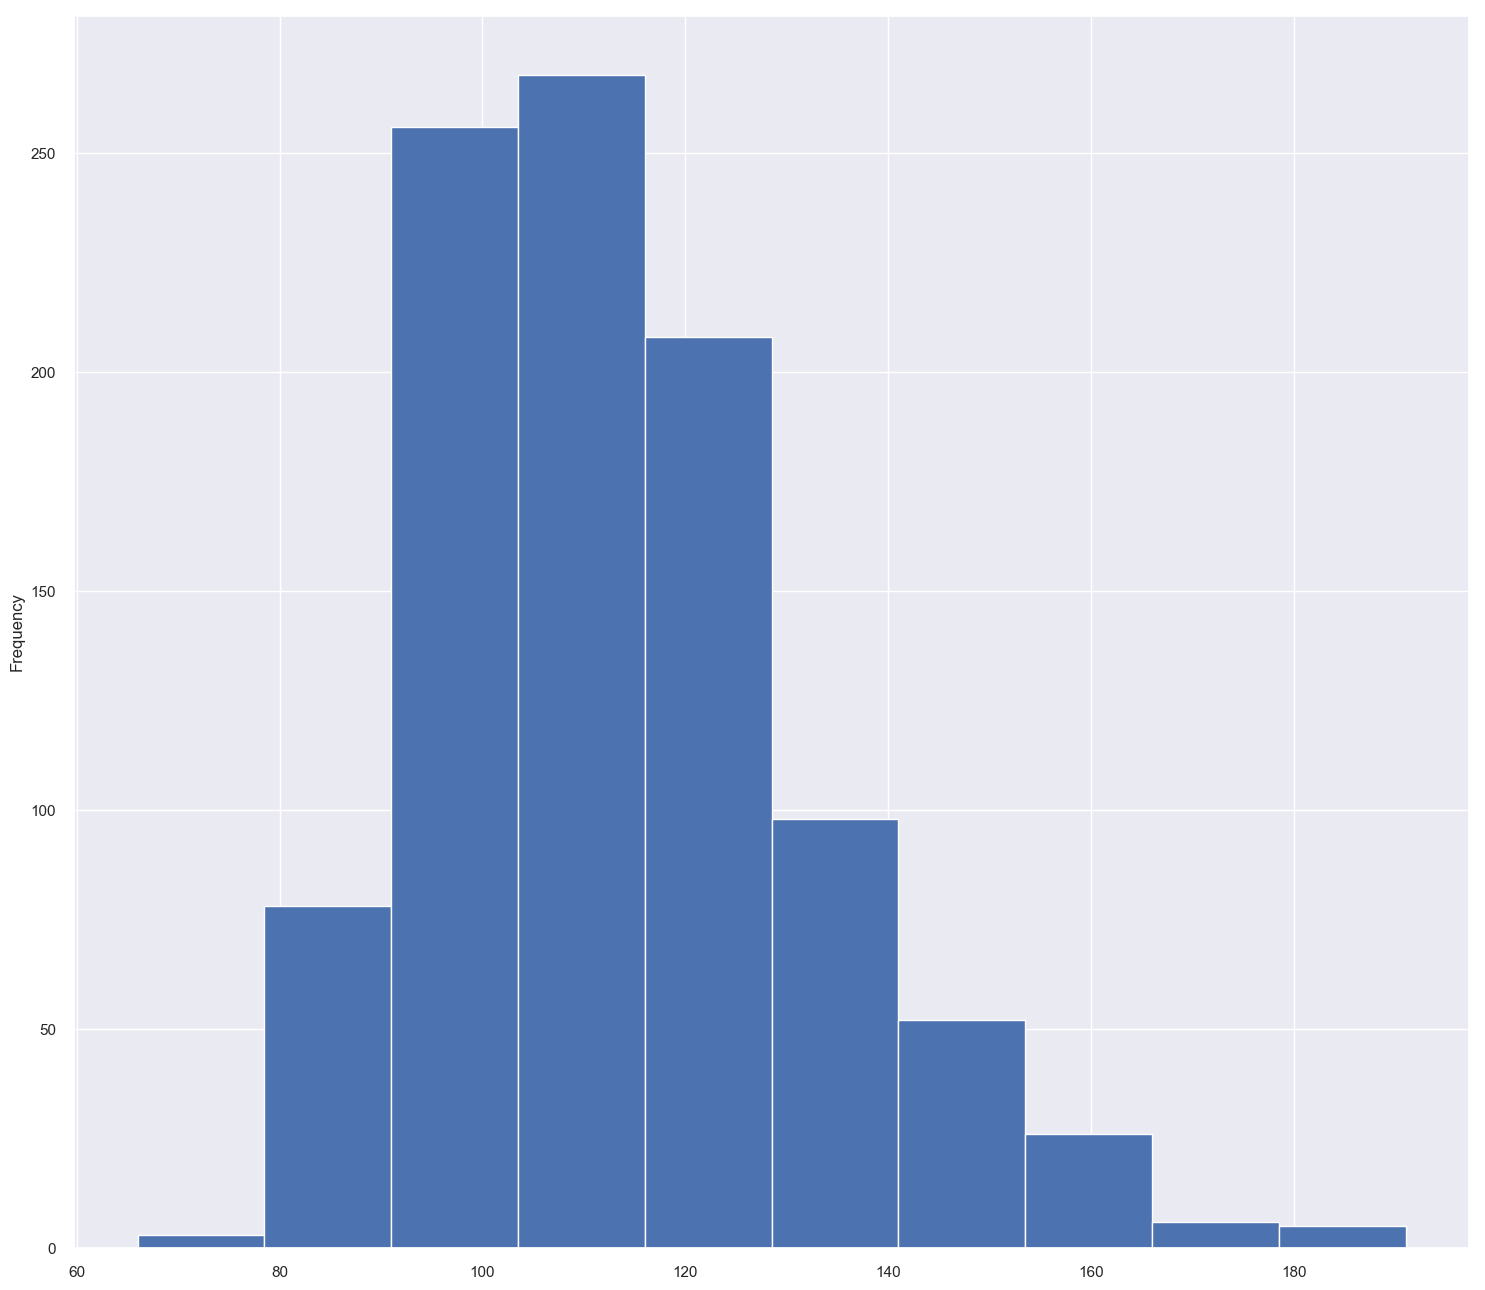

In [25]:
movies['Runtime (Minutes)'].sort_values().plot.hist()

#### Observation:
- Very __few movies__ have a __runtime of less than 80 mins and more than 165 mins__
- __Generally__ Movies have a __runtime of 90 mins to 130 mins__

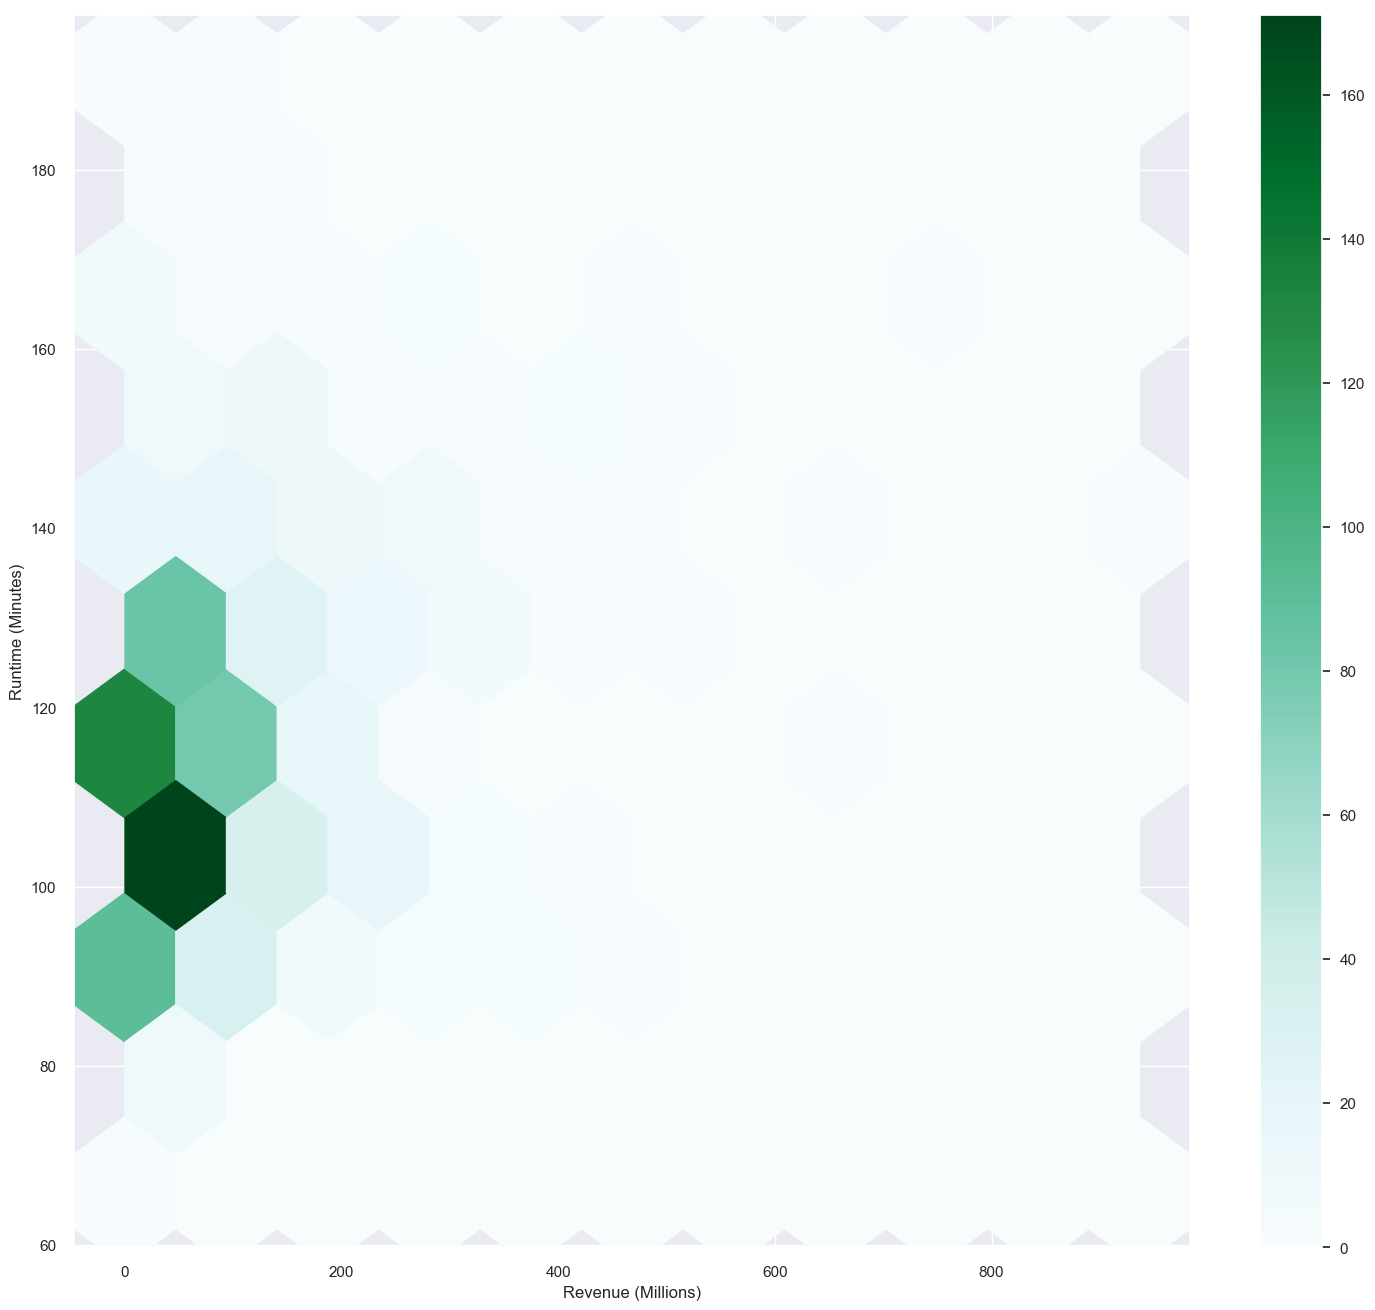

In [26]:
movies.plot.hexbin(x='Revenue (Millions)', y='Runtime (Minutes)', gridsize=10)

#### Observation
- A __large number__ of __Movies__ with a __runtime of 95-110 minutes produce a revenue of 0-100 millions__

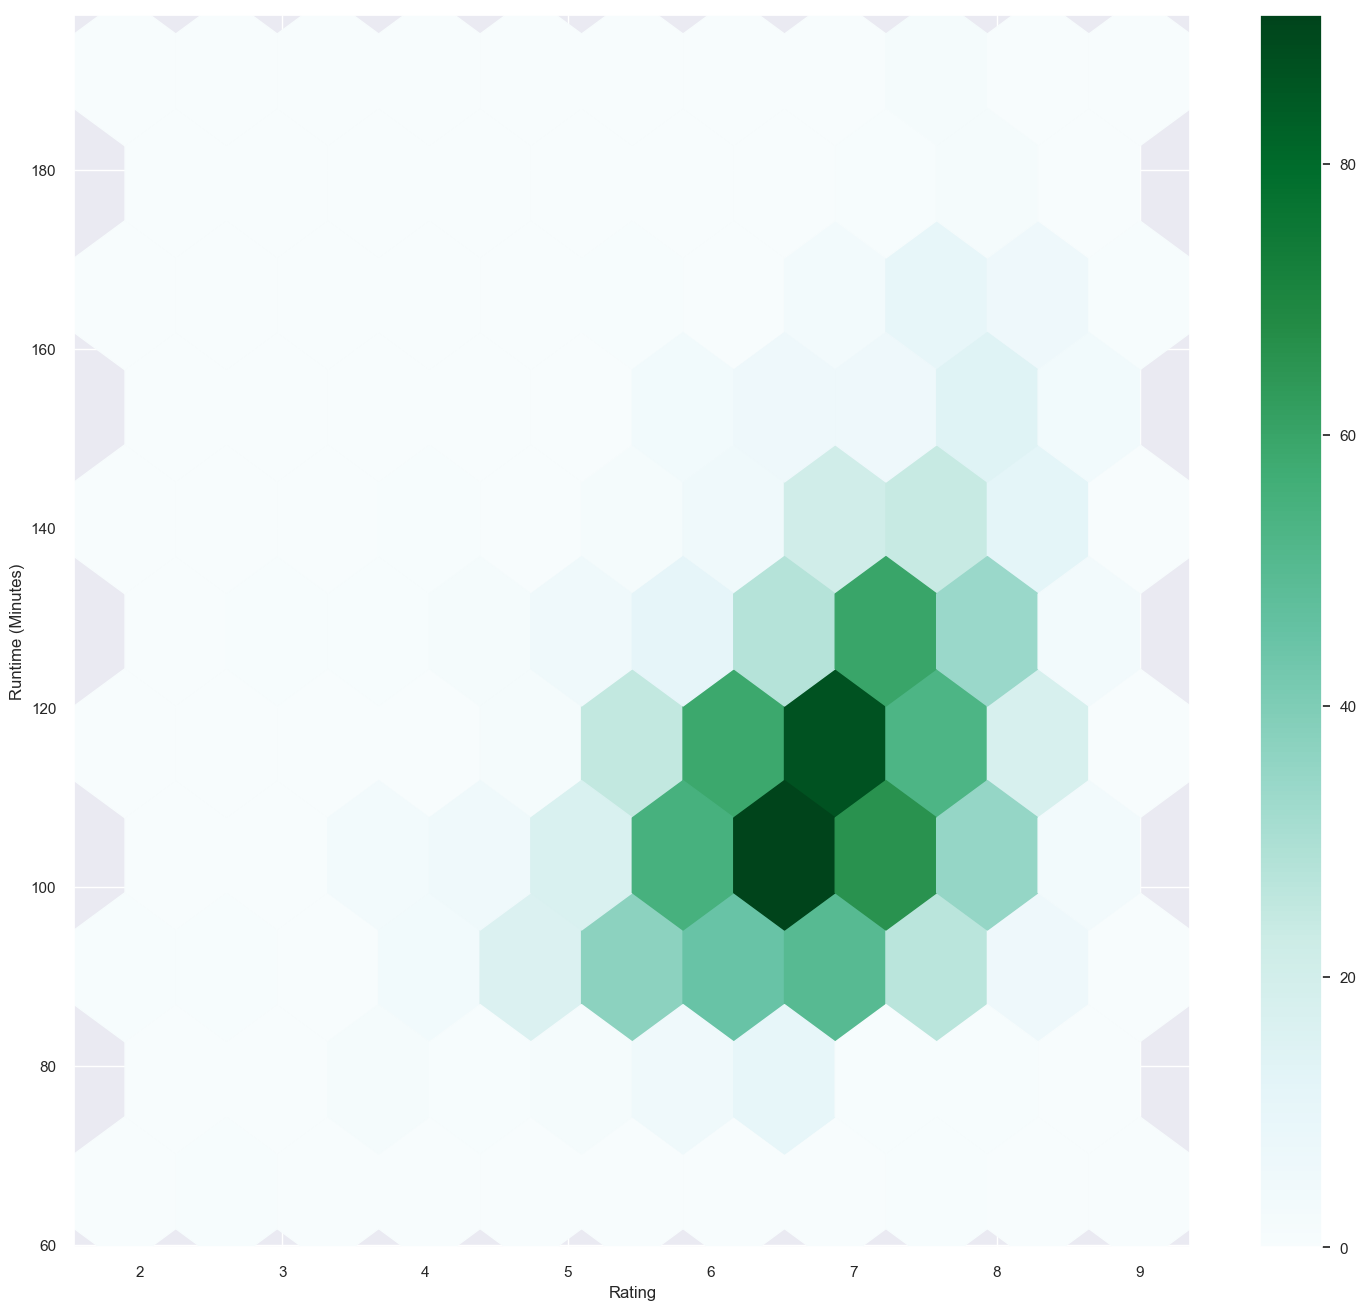

In [27]:
movies.plot.hexbin(x='Rating', y='Runtime (Minutes)', gridsize=10)

#### Observation
- A large number of movies with __runtime 95-125 mins get an average rating of 6-7.5__

__Q7)__ Effect of Metascore, are metascore and rating related ?

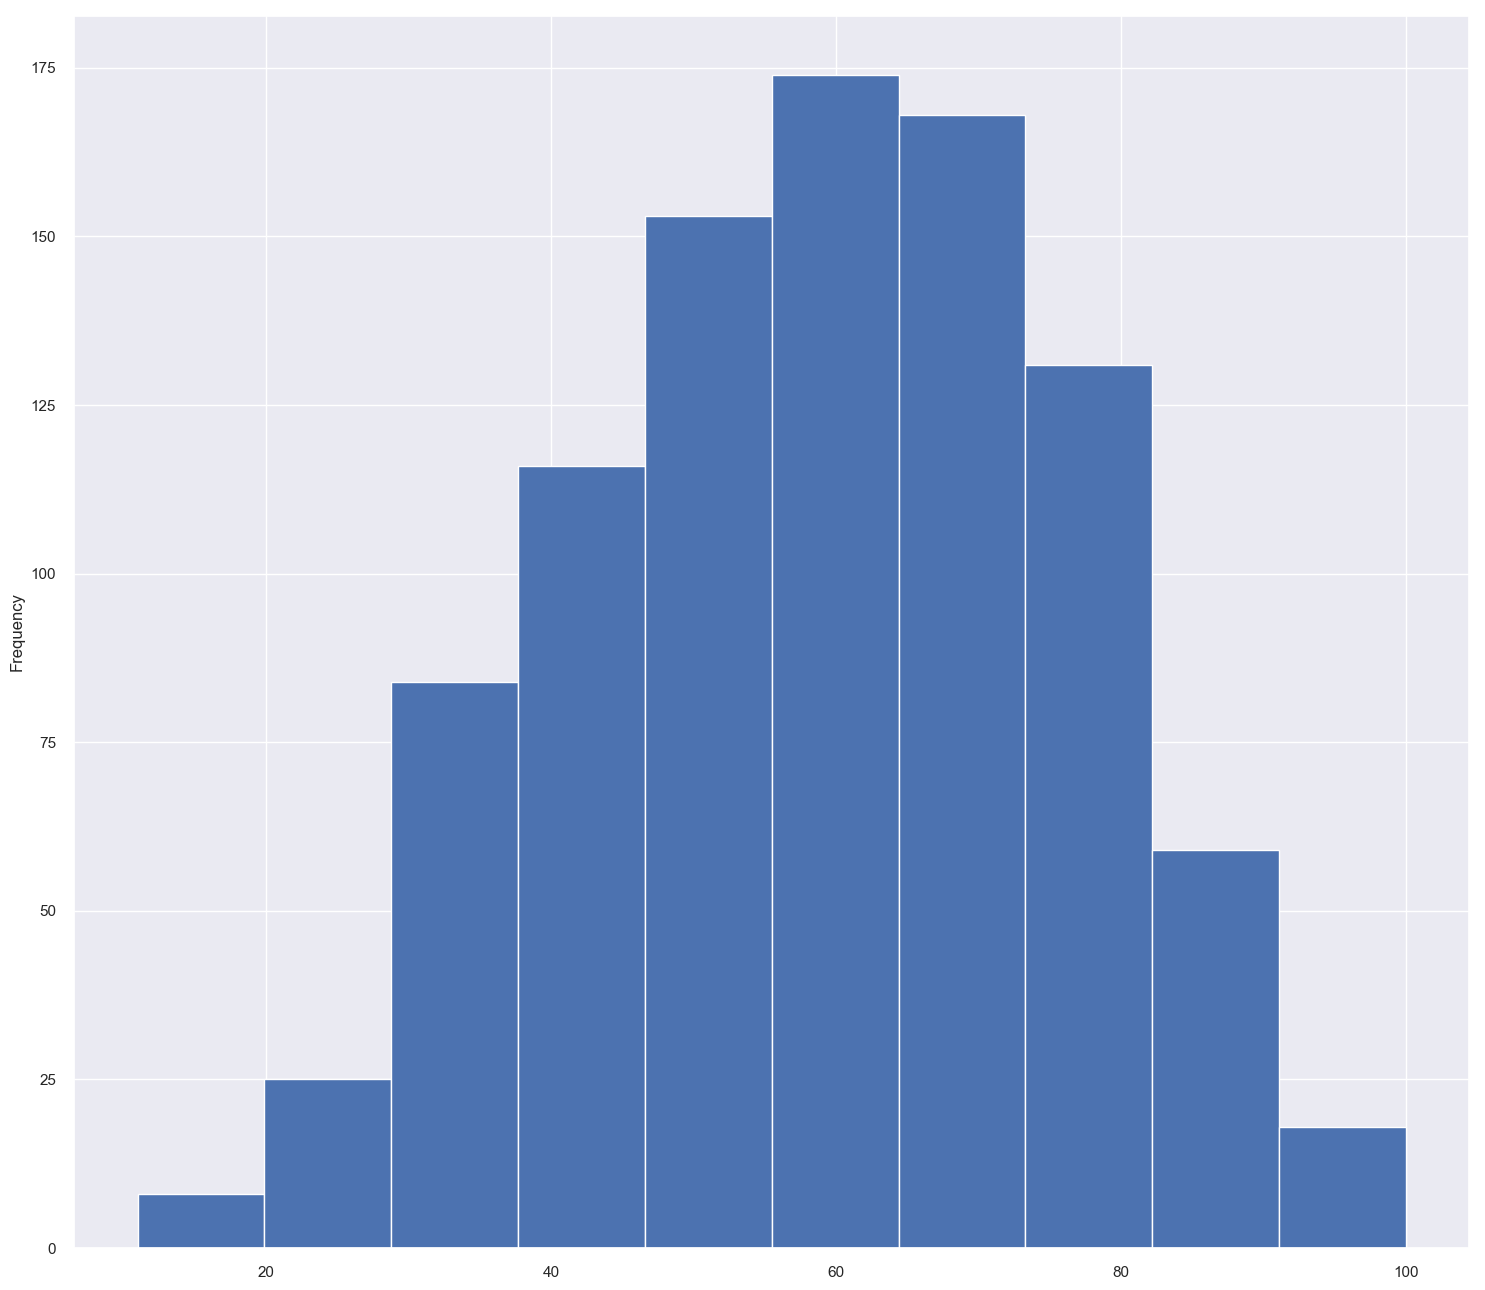

In [28]:
movies['Metascore'].sort_values().plot.hist()

#### Observation
- A __large amount__ of movies get a __metascore of 55-70__
- __Around 20__ movies get a  __good metascore of 90-100__
- The metascore has a perfect distribution

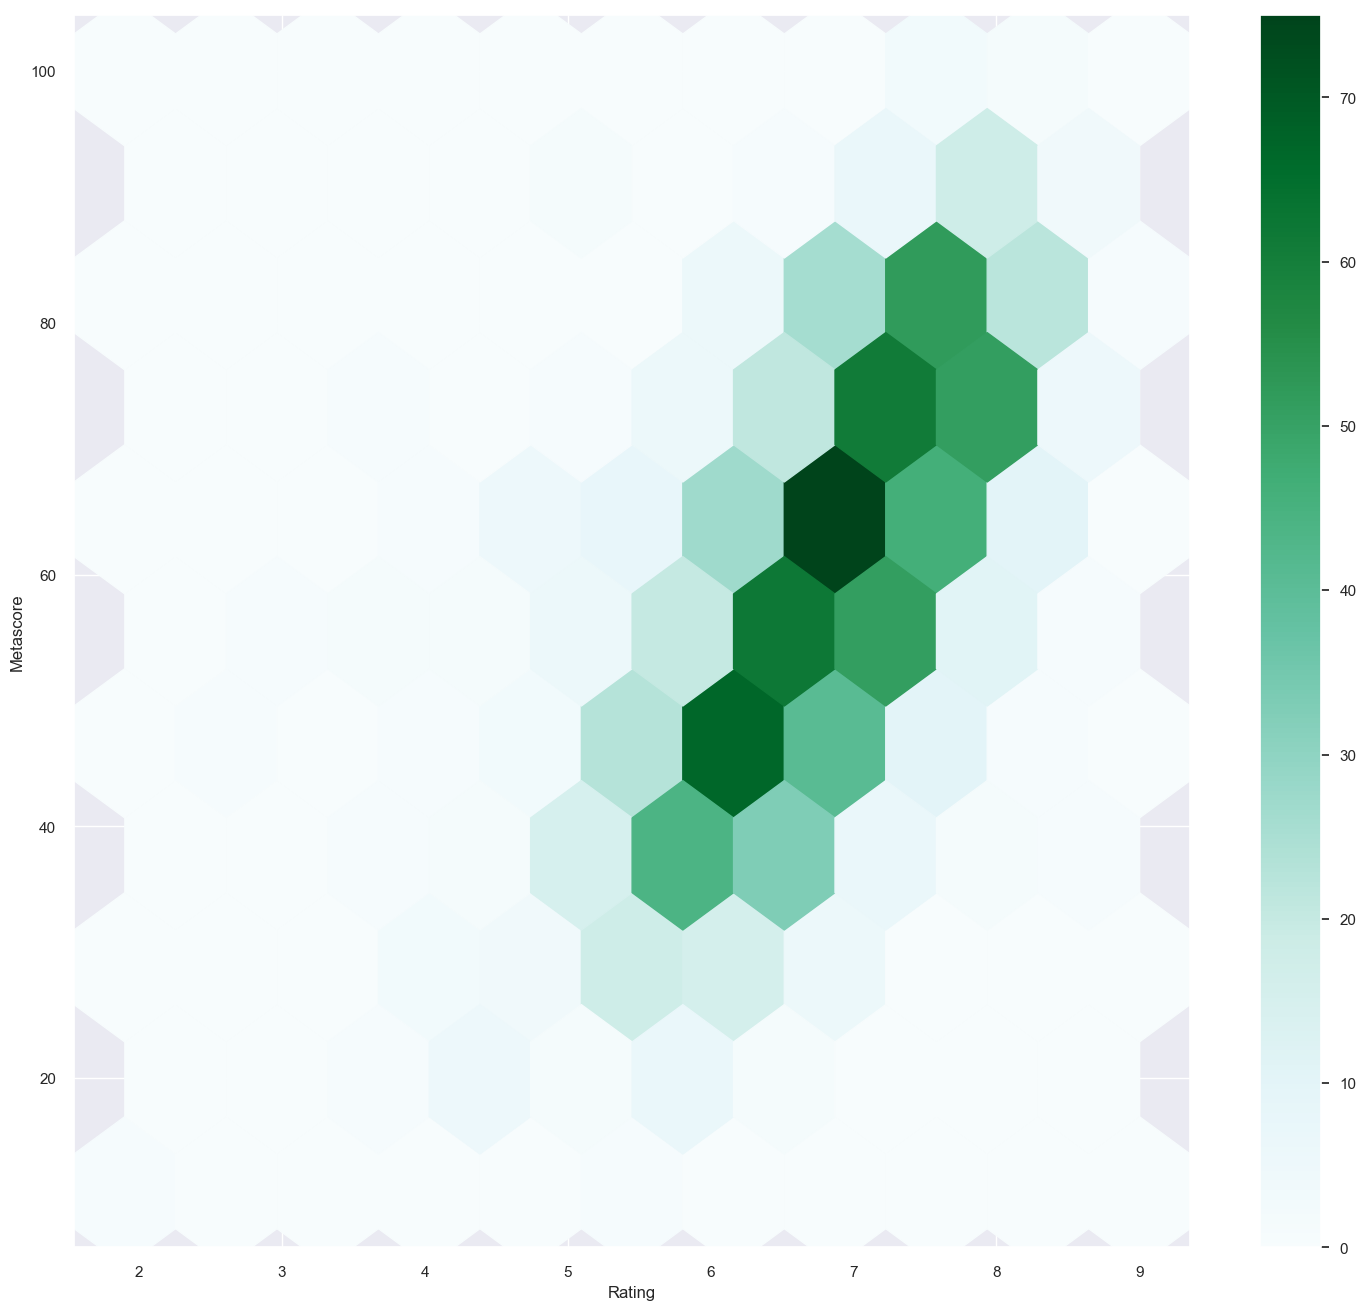

In [29]:
movies.plot.hexbin(x='Rating', y='Metascore',gridsize=10)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


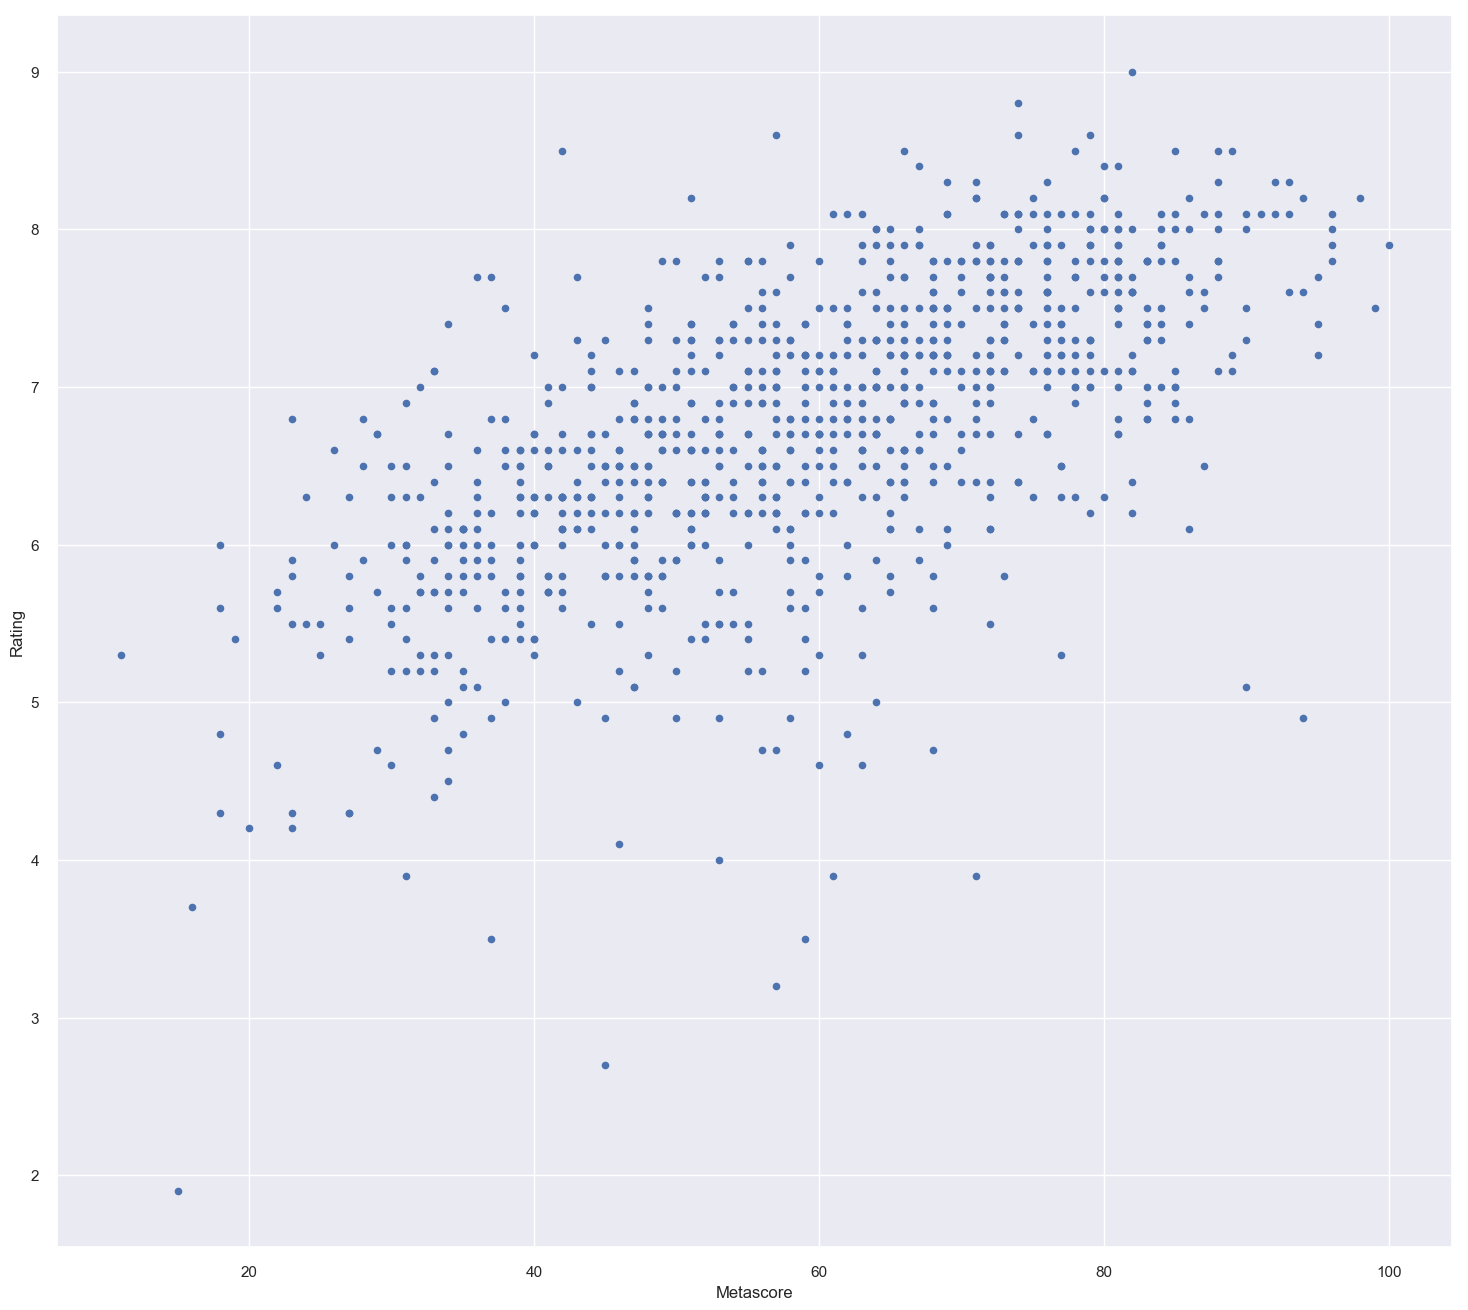

In [30]:
movies.plot.scatter(x='Metascore', y='Rating')

#### Observation
- The Scatter plot defines that Rating and Metascore are closely related

__Q8)__ Does votes affect rating?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


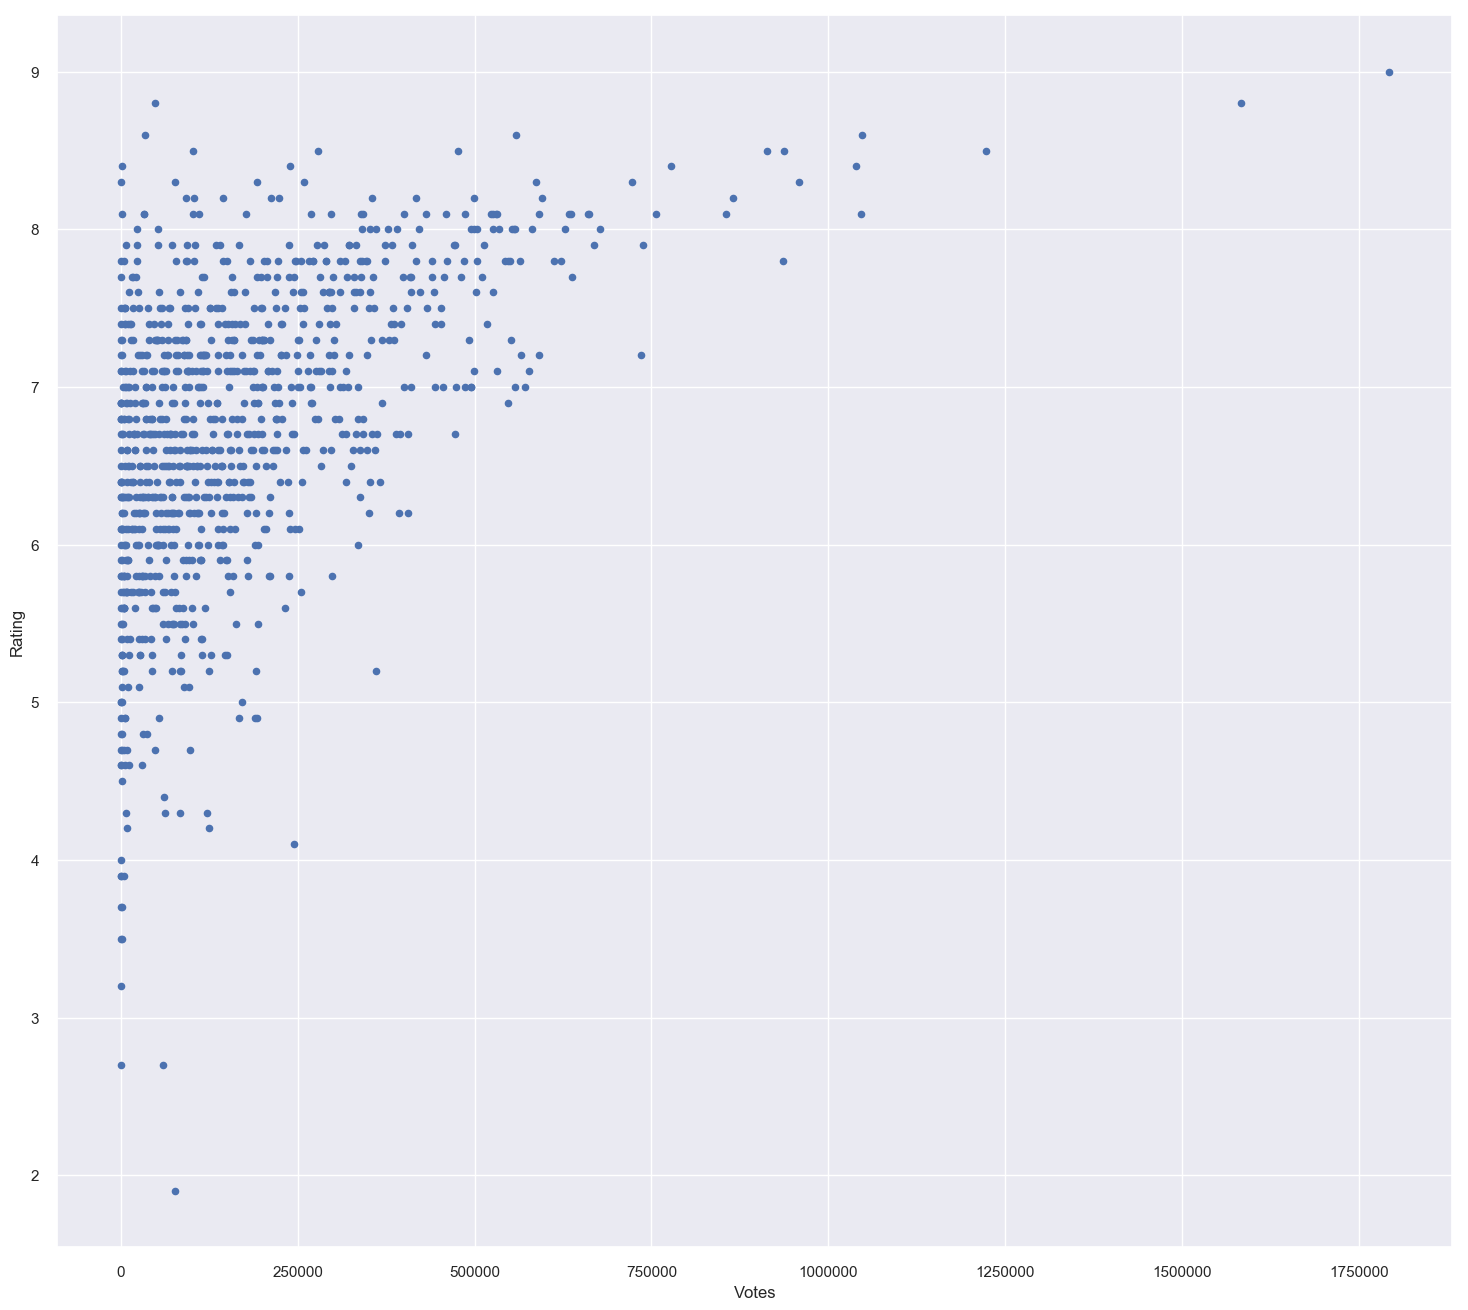

In [31]:
movies.plot.scatter(x='Votes', y='Rating')

##### Observation
- It will be very rare case in which the movie may receive a lot of votes but __when a movie gets a large number of votes it has a good rating__
- __The larger the number of votes the best is the rating__. 
- There is a __close co relation between Votes and Rating__

__Q9)__ What kind of Genres movies are made?

In [32]:
print("The count of different Genres for Genre 1")
movies.groupby(['Genre 1'])['Genre 1'].count().sort_values()

The count of different Genres for Genre 1


Genre 1
Romance        2
Sci-Fi         3
Fantasy        4
Thriller      10
Mystery       13
Horror        46
Animation     49
Biography     64
Crime         71
Adventure     75
Comedy       175
Drama        195
Action       293
Name: Genre 1, dtype: int64

- From the above data of Genre 1 we conclude that the top three primary Genre movies that are made are __ Action,Drama,Comedy__

Text(0.5, 1.0, 'Count plot for Genre 1')

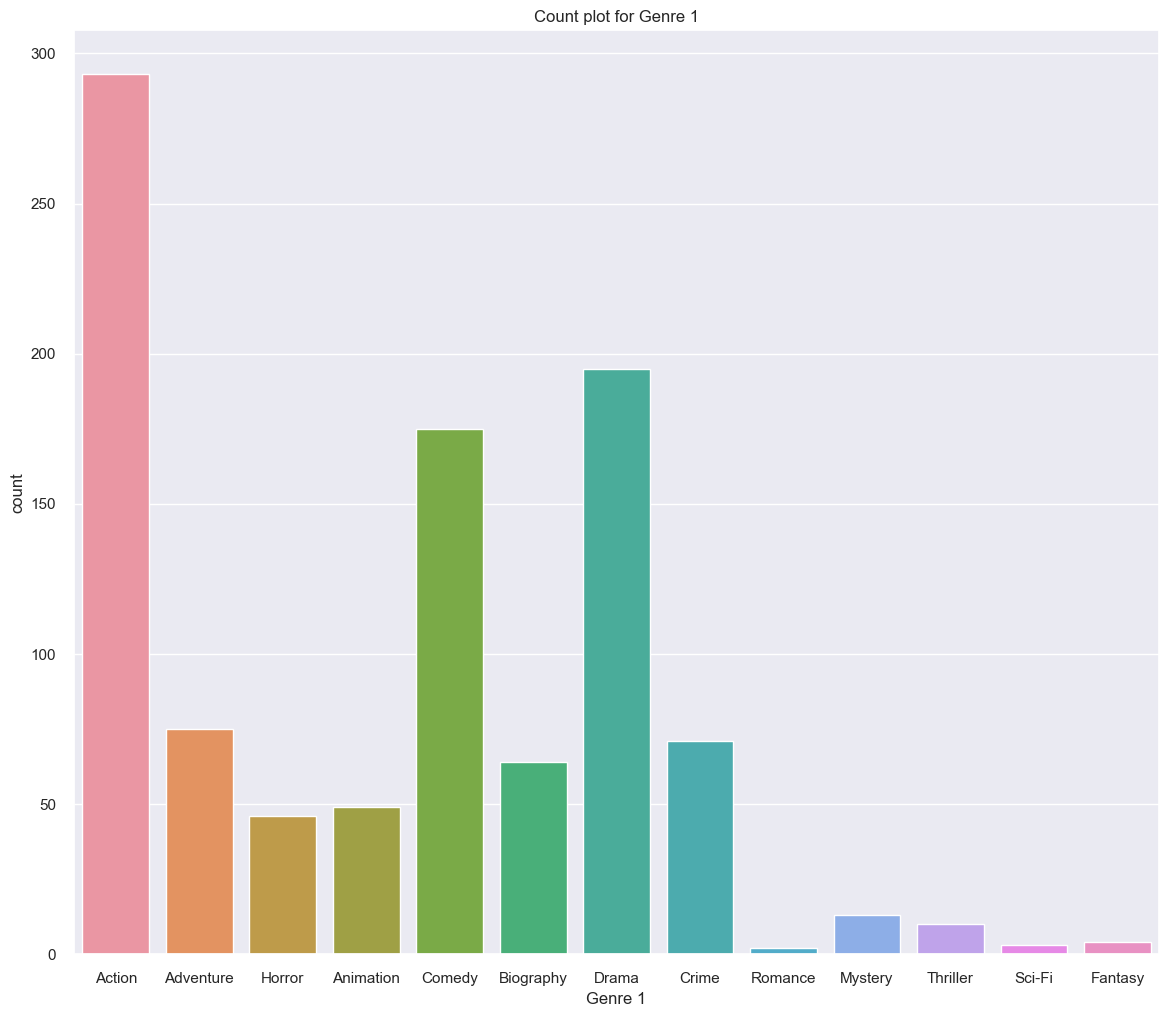

In [33]:
sns.set(rc={'figure.figsize':(14,12)})
sns.countplot(x='Genre 1', data=movies).set_title('Count plot for Genre 1')

In [34]:
print("The count of different Genres for Genre 2")
movies.groupby(['Genre 2'])['Genre 2'].count().sort_values()

The count of different Genres for Genre 2


Genre 2
Musical        1
Western        2
War            4
Sport          5
Music          8
History        8
Action        10
Biography     15
Family        27
Sci-Fi        28
Fantasy       35
Mystery       49
Horror        49
Thriller      52
Crime         58
Comedy        62
Romance       69
Adventure    175
Drama        238
Name: Genre 2, dtype: int64

- From the above data of Genre 2 we conclude that the top Genre movies that are made are __ Drama,Adventure,Romance,Comedy__
- Romance, Comedy, Crime, Thriller, Mystery, Horror made at the same level

Text(0.5, 1.0, 'Count plot for Genre 2')

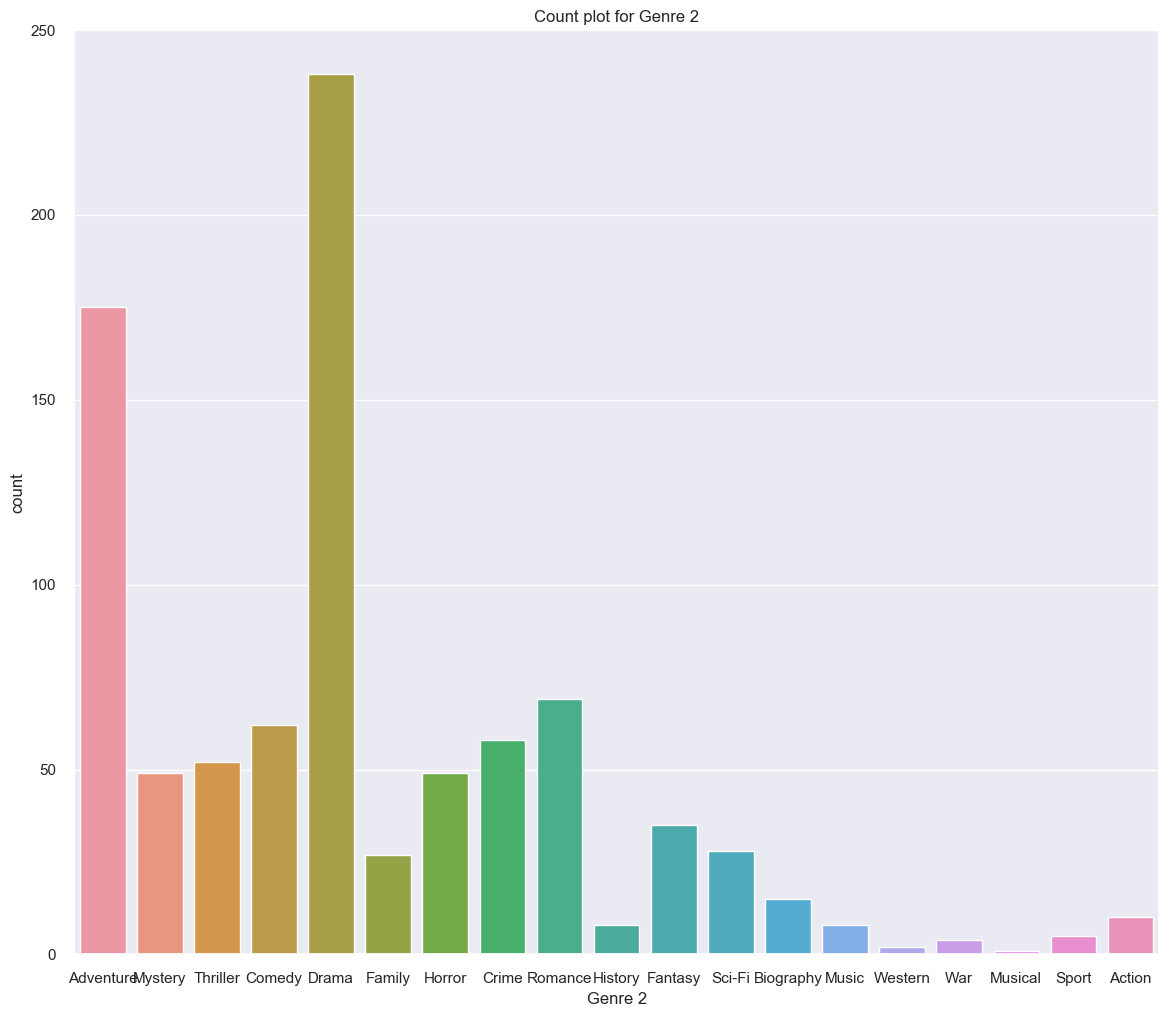

In [35]:
sns.set(rc={'figure.figsize':(14,12)})
sns.countplot(x='Genre 2', data=movies).set_title('Count plot for Genre 2')

In [36]:
print("The count of different Genres for Genre 3")
movies.groupby(['Genre 3'])['Genre 3'].count().sort_values()

The count of different Genres for Genre 3


Genre 3
Biography      2
Musical        4
Western        5
Music          8
War            9
Adventure      9
Sport         13
History       21
Crime         21
Family        24
Horror        24
Comedy        42
Mystery       44
Fantasy       62
Romance       70
Drama         80
Sci-Fi        89
Thriller     133
Name: Genre 3, dtype: int64

- From the above data of Genre 3 we conclude that the top Genre movies that are made are __ Thriller,Sci-Fi,Drama,Romance and Fantasy__

Text(0.5, 1.0, 'Count plot for Genre 3')

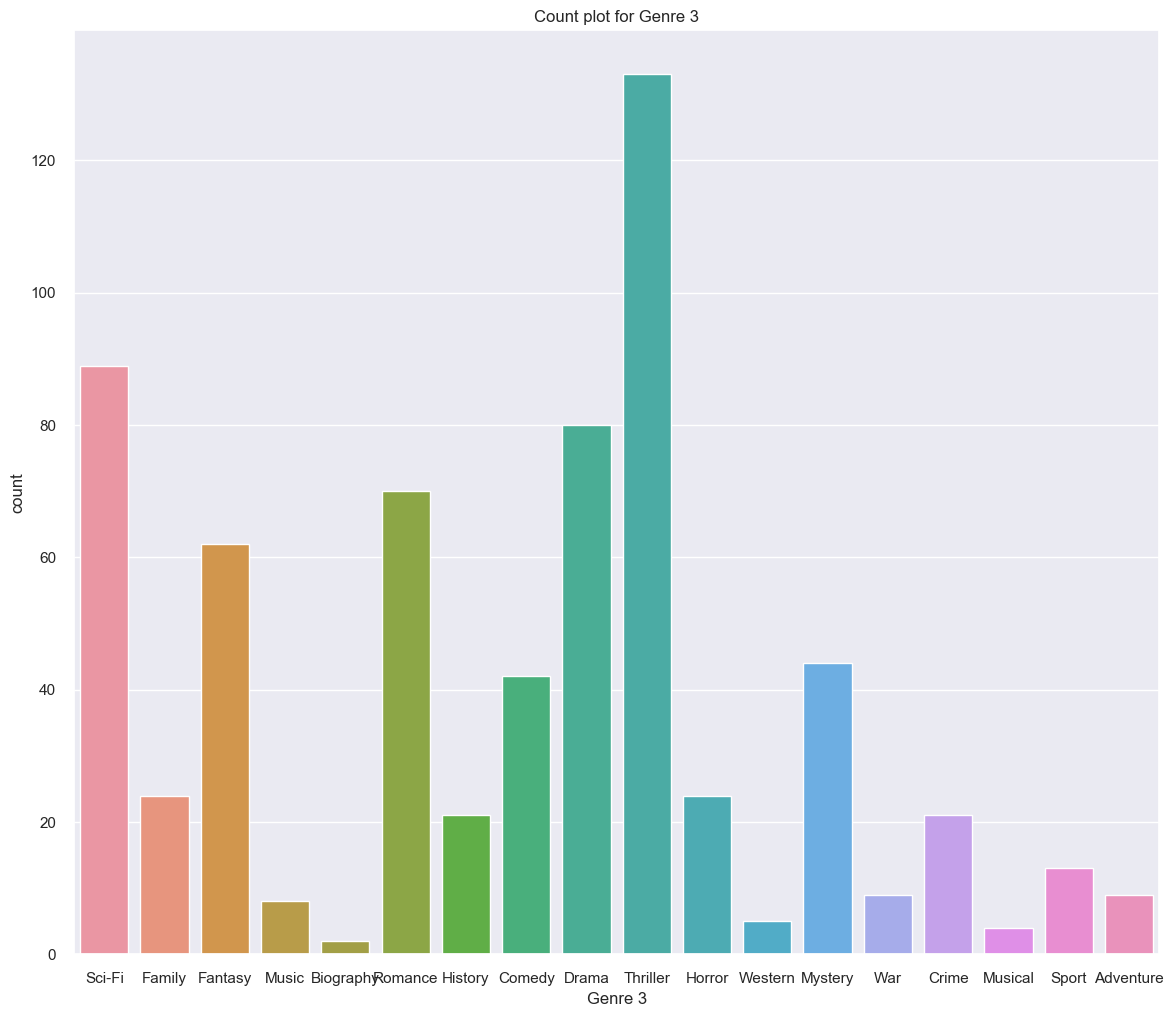

In [37]:
sns.set(rc={'figure.figsize':(14,12)})
sns.countplot(x='Genre 3', data=movies).set_title('Count plot for Genre 3')

#### Observation
- From evaluating the above data on Genres it is seen that Maximum movies have Drama in them within the data of 1000 Movies, 513 being for Drama meaning __around 50% movies have Drama as their Genre__
- __Action Movies__ are __also made but not as Drama__ with a count of 303 for a data of 1000 movies
- __Comedy Movies are made more than Adventure__ with a count of 279 for Comedy and 259 for Adventure 
- __Thriller movies are made more than Crime Movies__ with a count of 195 and 150
- __Crime and Romance movies are equally made__ as the count suggests from the above 150 for Crime and 141 for Romance

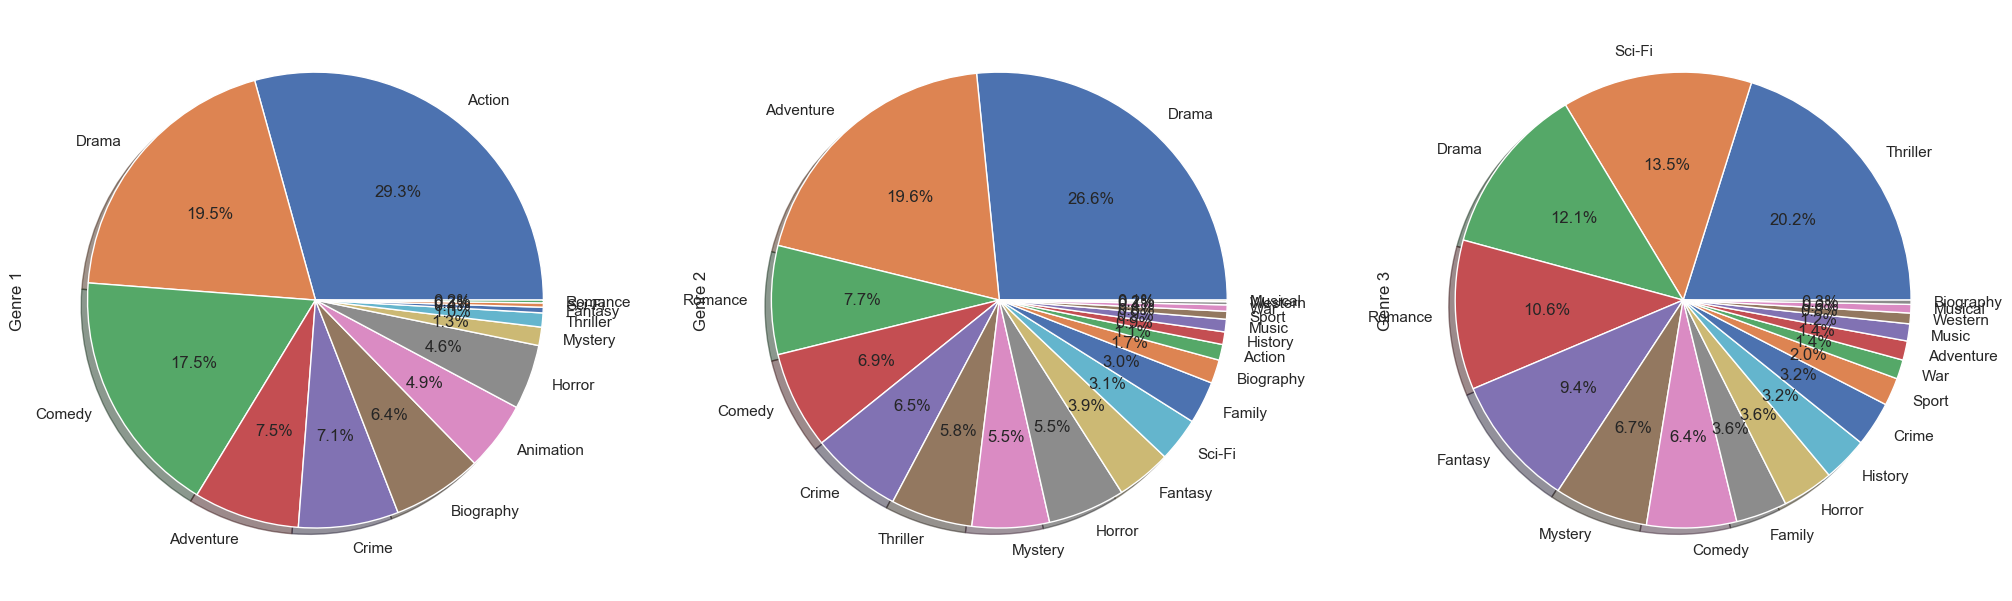

In [38]:
f,ax = plt.subplots(1,3,figsize=(25,8))
movies['Genre 1'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
movies['Genre 2'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
movies['Genre 3'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)

- __Drama is the most preferred Genre__ thats why it is made 

__Q10)__ Which genre produces best Revenue in years 2015,2016?

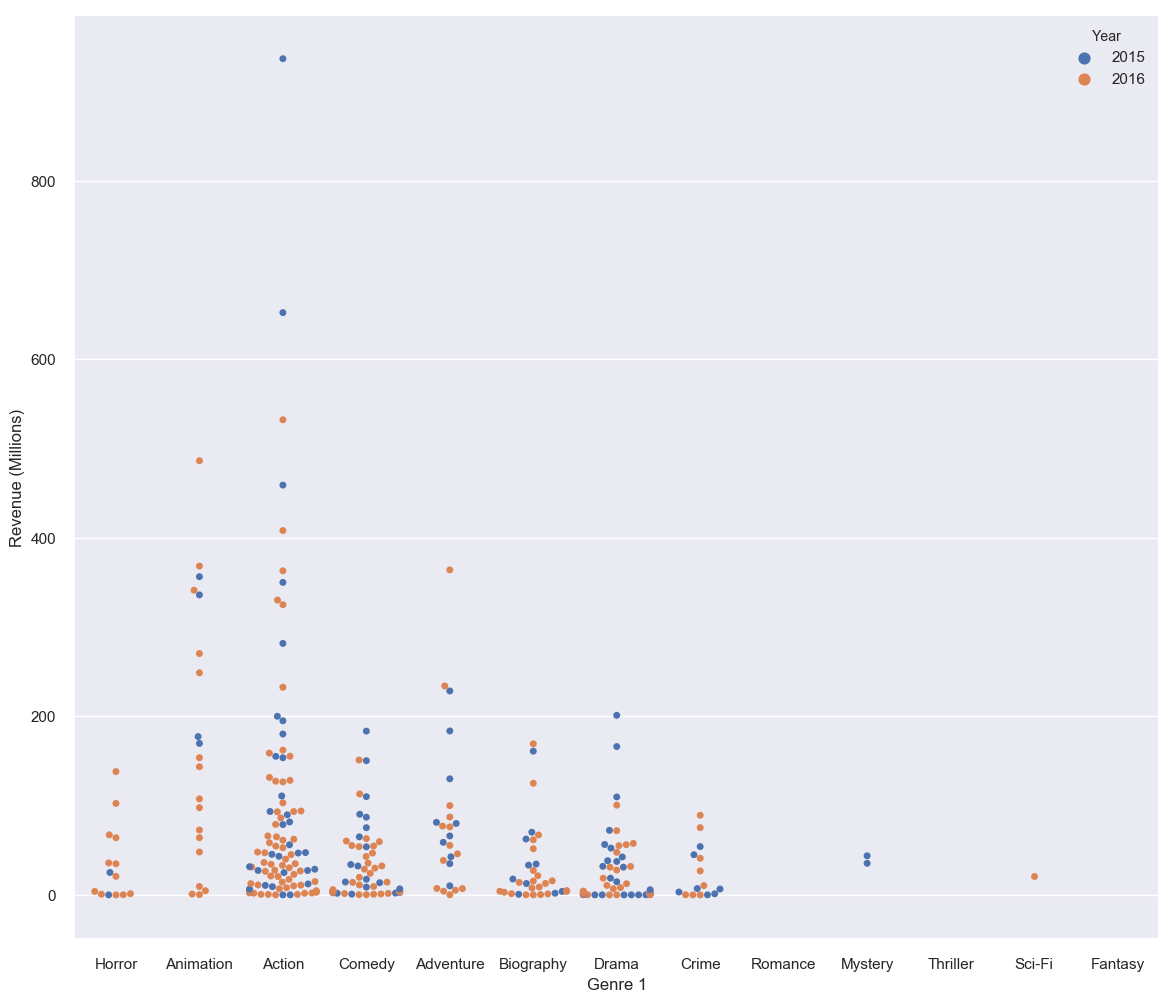

In [39]:
sns.swarmplot(x="Genre 1", y="Revenue (Millions)", hue="Year",data=movies.loc[movies['Year'].isin(['2015', '2016'])])

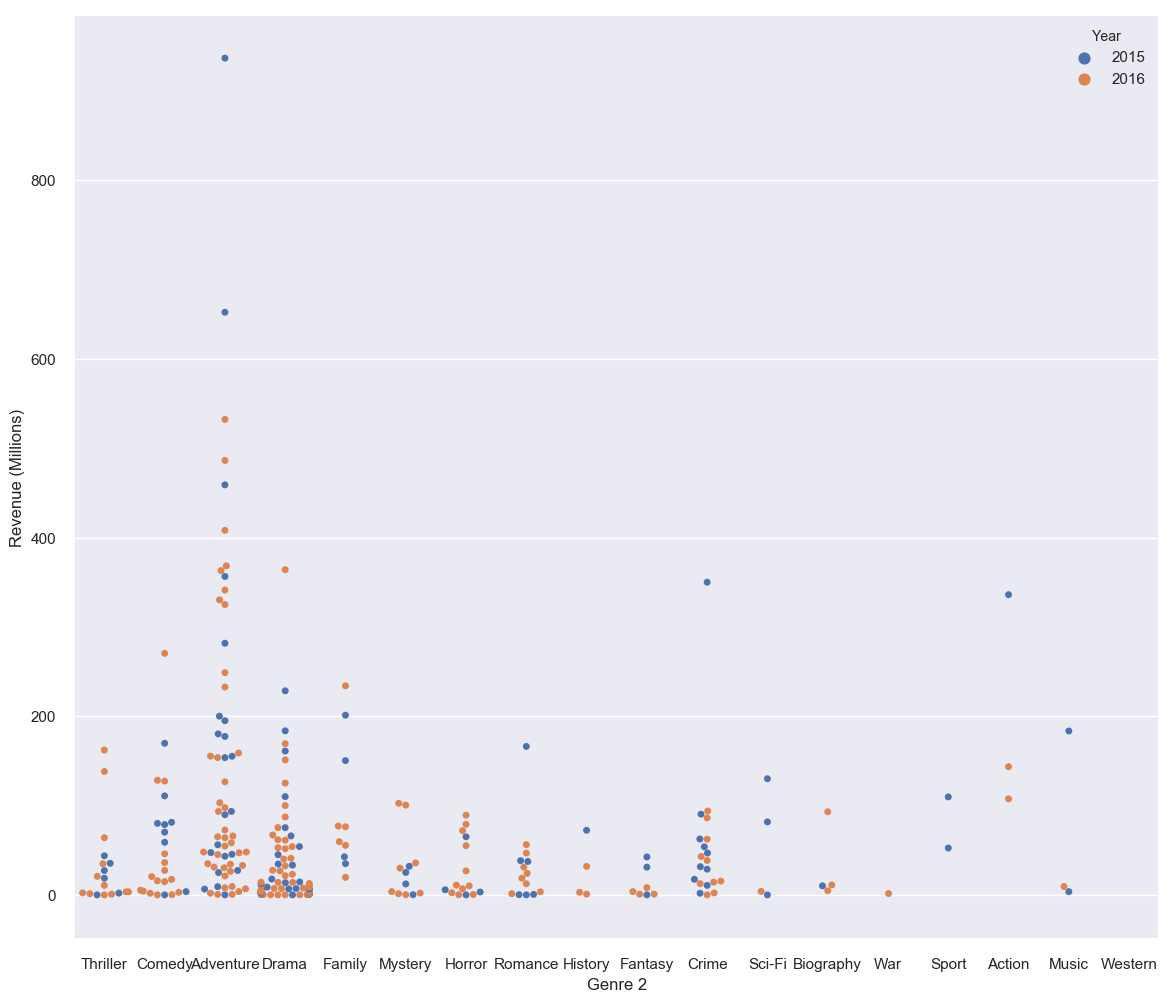

In [40]:
sns.swarmplot(x="Genre 2", y="Revenue (Millions)", hue="Year",data=movies.loc[movies['Year'].isin(['2015', '2016'])])

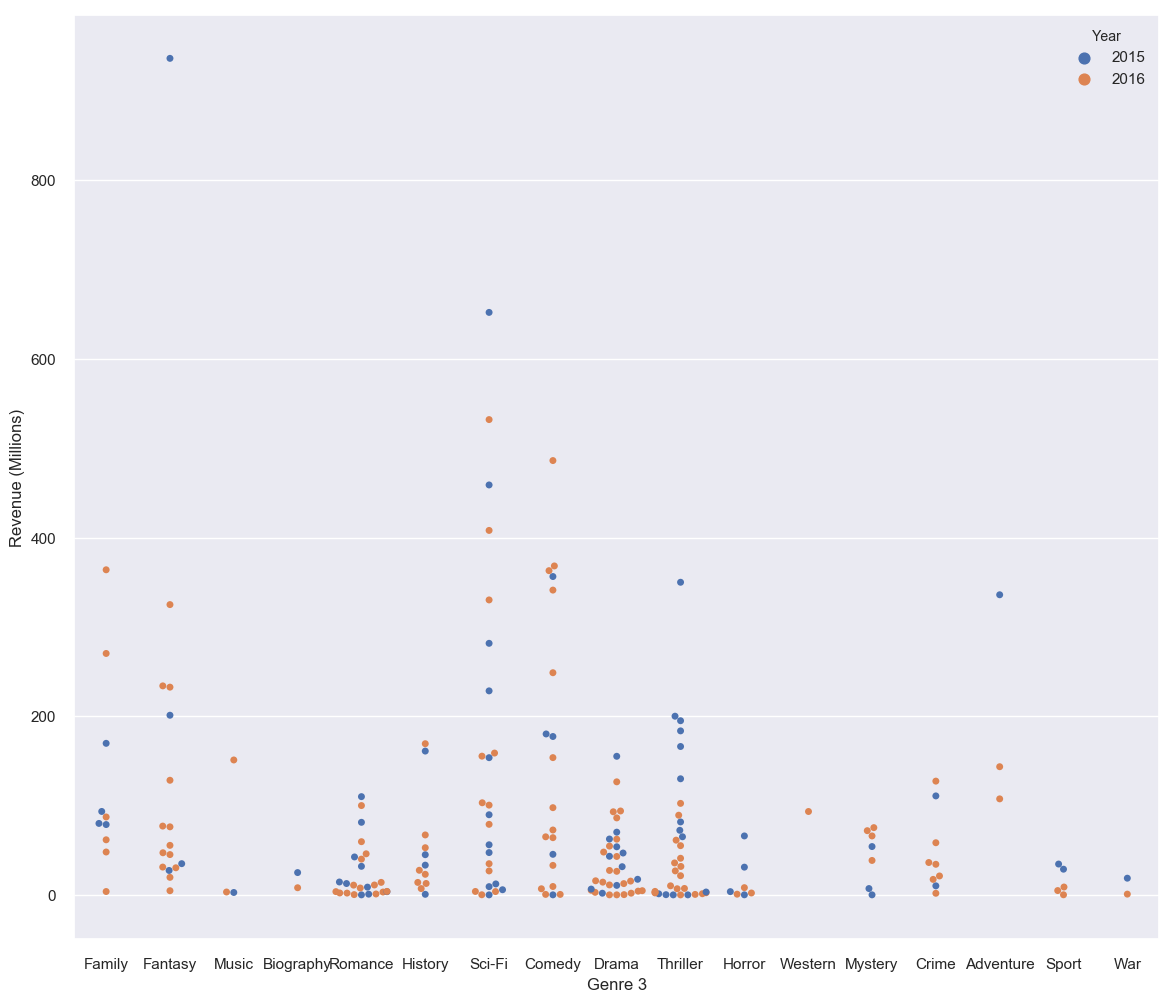

In [41]:
sns.swarmplot(x="Genre 3", y="Revenue (Millions)", hue="Year",data=movies.loc[movies['Year'].isin(['2015', '2016'])])

- From the above plots it is observed that __Drama,Adventure,Action,Comedy movies__ are made and they have __generated large amount of revenue in the year 2015,2016__
- __2016 has generated more revenue as compared to 2015__

# Conclusions
- The Movies data set helps us in deducting that year by year more and more Movies are being made,also there is a sudden increase in the creation of movies in year 2016 as compared to year 2015
- There are 128 Movies which did not generate revenue at all even after releasing in the year Range 2006-2016
- Maximum number of Movies get the rating of 7.1, there is only one movie which got a rating on 9
- A large number of movies get ratings from the range of 6.1-7.5
- Director Ridley Scott has Directed the maximum number of movies which are 8 in a period of 2006-2016,maximum Directors only direct a movie in a span of 10 years
- Maximum movies produce a revenue in the range of 0-100 (Millions),Very few Movies generate a revenue in the range of 380-650 (Millions)
- Generally Movies have a runtime of 90 mins to 130 mins.A large number of movies with runtime 95-125 mins get an average rating of 6-7.5
- When a movie gets a large number of votes it has a good rating.The larger the number of votes the best is the rating. There is a close co relation between Votes and Rating
- Maximum movies have Drama in them within the data of 1000 Movies, 513 being for Drama meaning around 50% movies have Drama as their Genre
- It is observed that Drama,Adventure,Action,Comedy movies are made and they have generated large amount of revenue in the year 2015,2016, Mostly movies with revenue of less than 100 million contribute to the revenue generation of the year.